## Content

- **Problem Statement**

- **KNN Intro**
    - Application and usage
    - Geometric Intuition

- **Distance Metrics**

- **Implementation of Knn**
    - Knn using sklearn

- **Weighted Knn**

- **Assumptions of Knn**

- **Time complexity of Knn**

- **Bias - Variance Trade off**

- **Multi Class classification using Knn**

- **Outliers**

- **KNN based Imputation**


## Problem statement

Working at at a leading consumer goods company, you have different supermarkets and resellers buying various products from you. Based on the purchase history you have devided the resellers into classes for better inventory management and customer handling.
You have new customers for your company and you want to classify them as well into those classes based on the order they give
The data set refers to clients of your company. It includes the count of orders on diverse product categories.





In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1hio0ntKXvy9jZEOK2Tg0czv50zer5Kek


Downloading...
From: https://drive.google.com/uc?id=1hio0ntKXvy9jZEOK2Tg0czv50zer5Kek
To: /content/binary_class.csv
100% 9.12k/9.12k [00:00<00:00, 13.5MB/s]


In [ ]:
df=pd.read_csv('binary_class.csv')
df.head()

Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  class
0       3  12669  9656     7561     214              2674        1338      2
1       3   7057  9810     9568    1762              3293        1776      2
2       3   6353  8808     7684    2405              3516        7844      2
3       3  13265  1196     4221    6404               507        1788      1
4       3  22615  5410     7198    3915              1777        5185      1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            267 non-null    int64
 1   Fresh             267 non-null    int64
 2   Milk              267 non-null    int64
 3   Grocery           267 non-null    int64
 4   Frozen            267 non-null    int64
 5   Detergents_Paper  267 non-null    int64
 6   Delicassen        267 non-null    int64
 7   class             267 non-null    int64
dtypes: int64(8)
memory usage: 16.8 KB


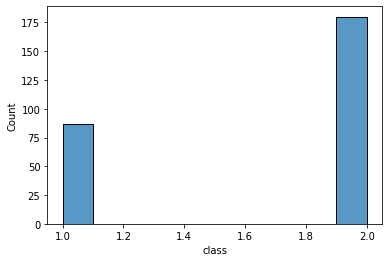

In [ ]:
import seaborn as sns
sns.histplot(data=df, x="class")

In [ ]:
X=df[['Region',	'Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen'	]].copy()
y=df[['class']].copy()

## K Nearest Neighbor (KNN)

### Introduction

K-Nearest Neighbors

* K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
* The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
* K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
* K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
* It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.




### Applications and usage

k-NN is often used in search applications where you are looking for “similar” items; that is, when your task is some form of “find items similar to this one”. You’d call this a k-NN search.


So, some concrete examples of k-NN search:

* If you’re searching for semantically similar documents (i.e., documents containing similar topics), this is referred to as Concept Search.

* The biggest use case of k-NN search might be Recommender Systems

* KNN can be effectively used in detecting outliers. One such example is Credit Card fraud detection.

* Missing data imputation is a procedure that uses the KNN algorithm to estimate missing values.

### Geometric intution

Lets understand KNN algorithm geometrically with a simple example:
-  Lets assume we have a few +ve class data and -ve class data points in our Training data

- Now in our test data we have a query point $x_q$

#### What will be the class label for $x_q$ ?
- From the plot, its  Most likely to be +ve class data point
- Since all the surrounding points are +ve

Now if we had a $x_q$ in the near the -ve class data points then 
#### what will the class label for $x_q$ be ? 
- -ve since the surrounding points are all -ve



**This shows that KNN is a neighborhood Algorithm, since it checks the neighborhood of $x_q$ and then assigns class label to the data point.**

#### But if now our $x_q$ is at point such that there are 3 -ve class data points and one +ve class data point, what will the class label for $x_q$ for such case be ?
- Now if we are considering 4 points around $x_q$ , we can say
    - $x_q$ belongs to -ve class since majority of neighbor points are -ve class labels

- but if we consider only 1 point around $x_q$, we can say
    - $x_q$ belongs to +ve class since the distance between the +ve class data point and $x_q$ is minimum

Hence this means that the number of points we consider as our neighborhood thus impacts the KNN. 
- Therefore the K in the KNN means the number of  points we are to consider as our neighborhood.



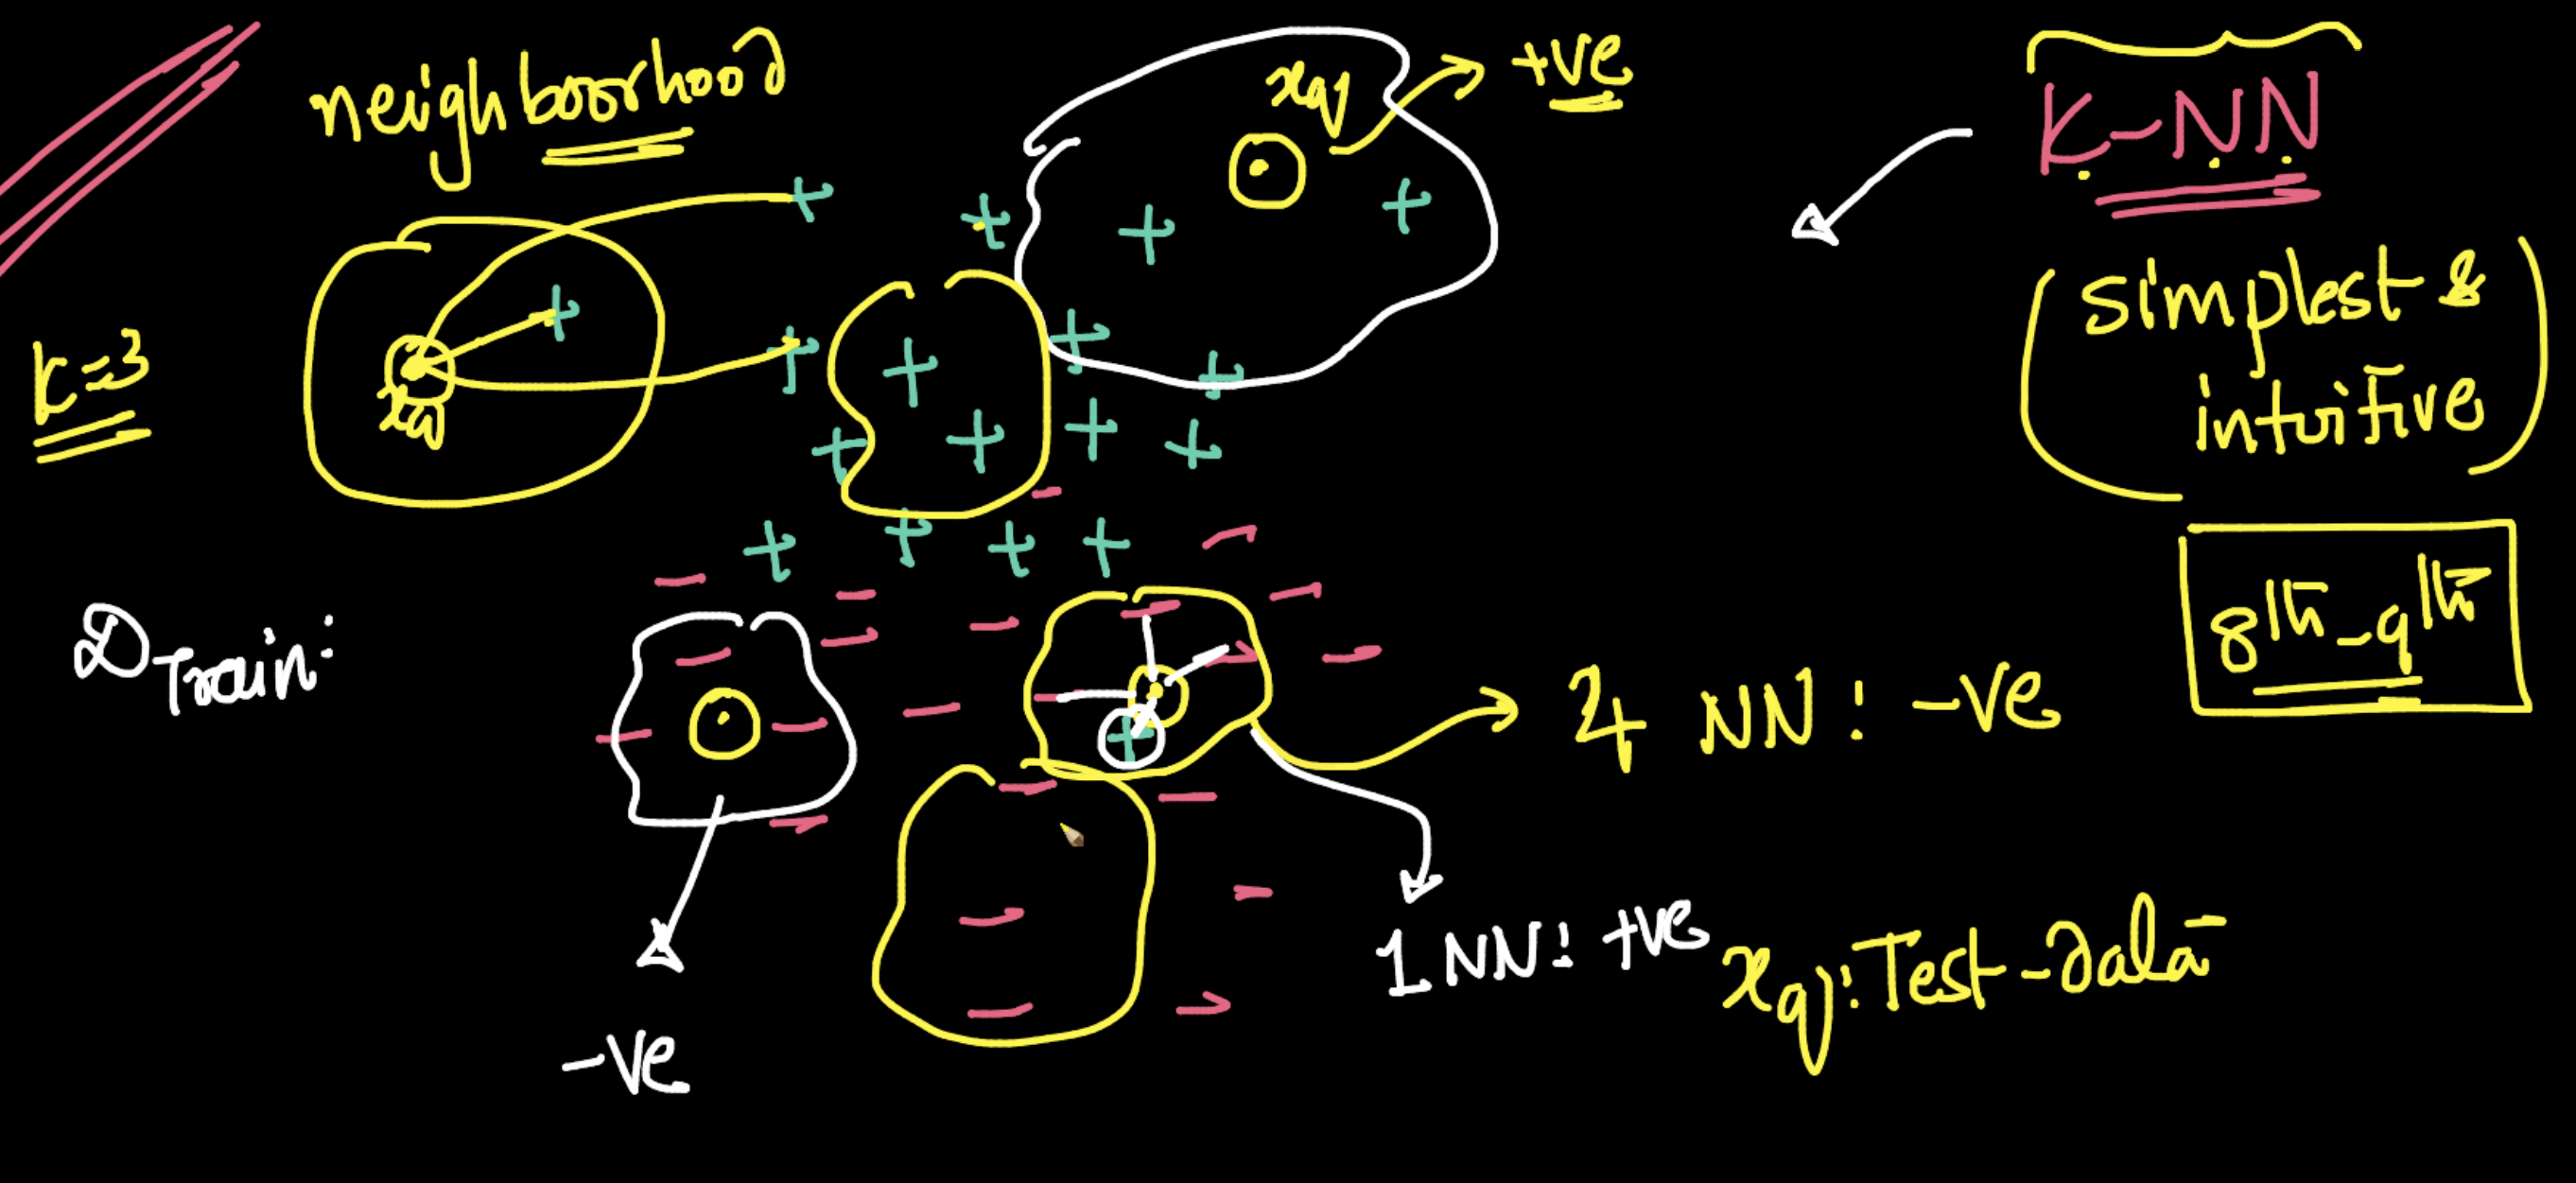

**ASSESSMENTS COVERED**

- https://www.scaler.com/hire/test/problem/16260/



- We already have training data with us, and we have a data point $x_q$ in test data, 

Lets write the pseudo code for KNN algorithm

### The KNN Algorithm
1. for each $x_i$ in training data
    - Compute distance between $x_i$ and $x_q$
    - And store it in a distance vector $D$
2. Sort the distance vector $D$
3. Then pick the K Nearest Neighbors, or the points which have the least distance from $x_q$
4. Take majority vote of class label from all the K points and return the class label which has the max vote for $x_q$ 

In simple words, 
- if we take K = 5, and after sorting the distance vector 
- we get 3 +ve class label data points and 2 -ve Class label data  
- then through majority voting, $x_q$ will belong to +ve class.




    

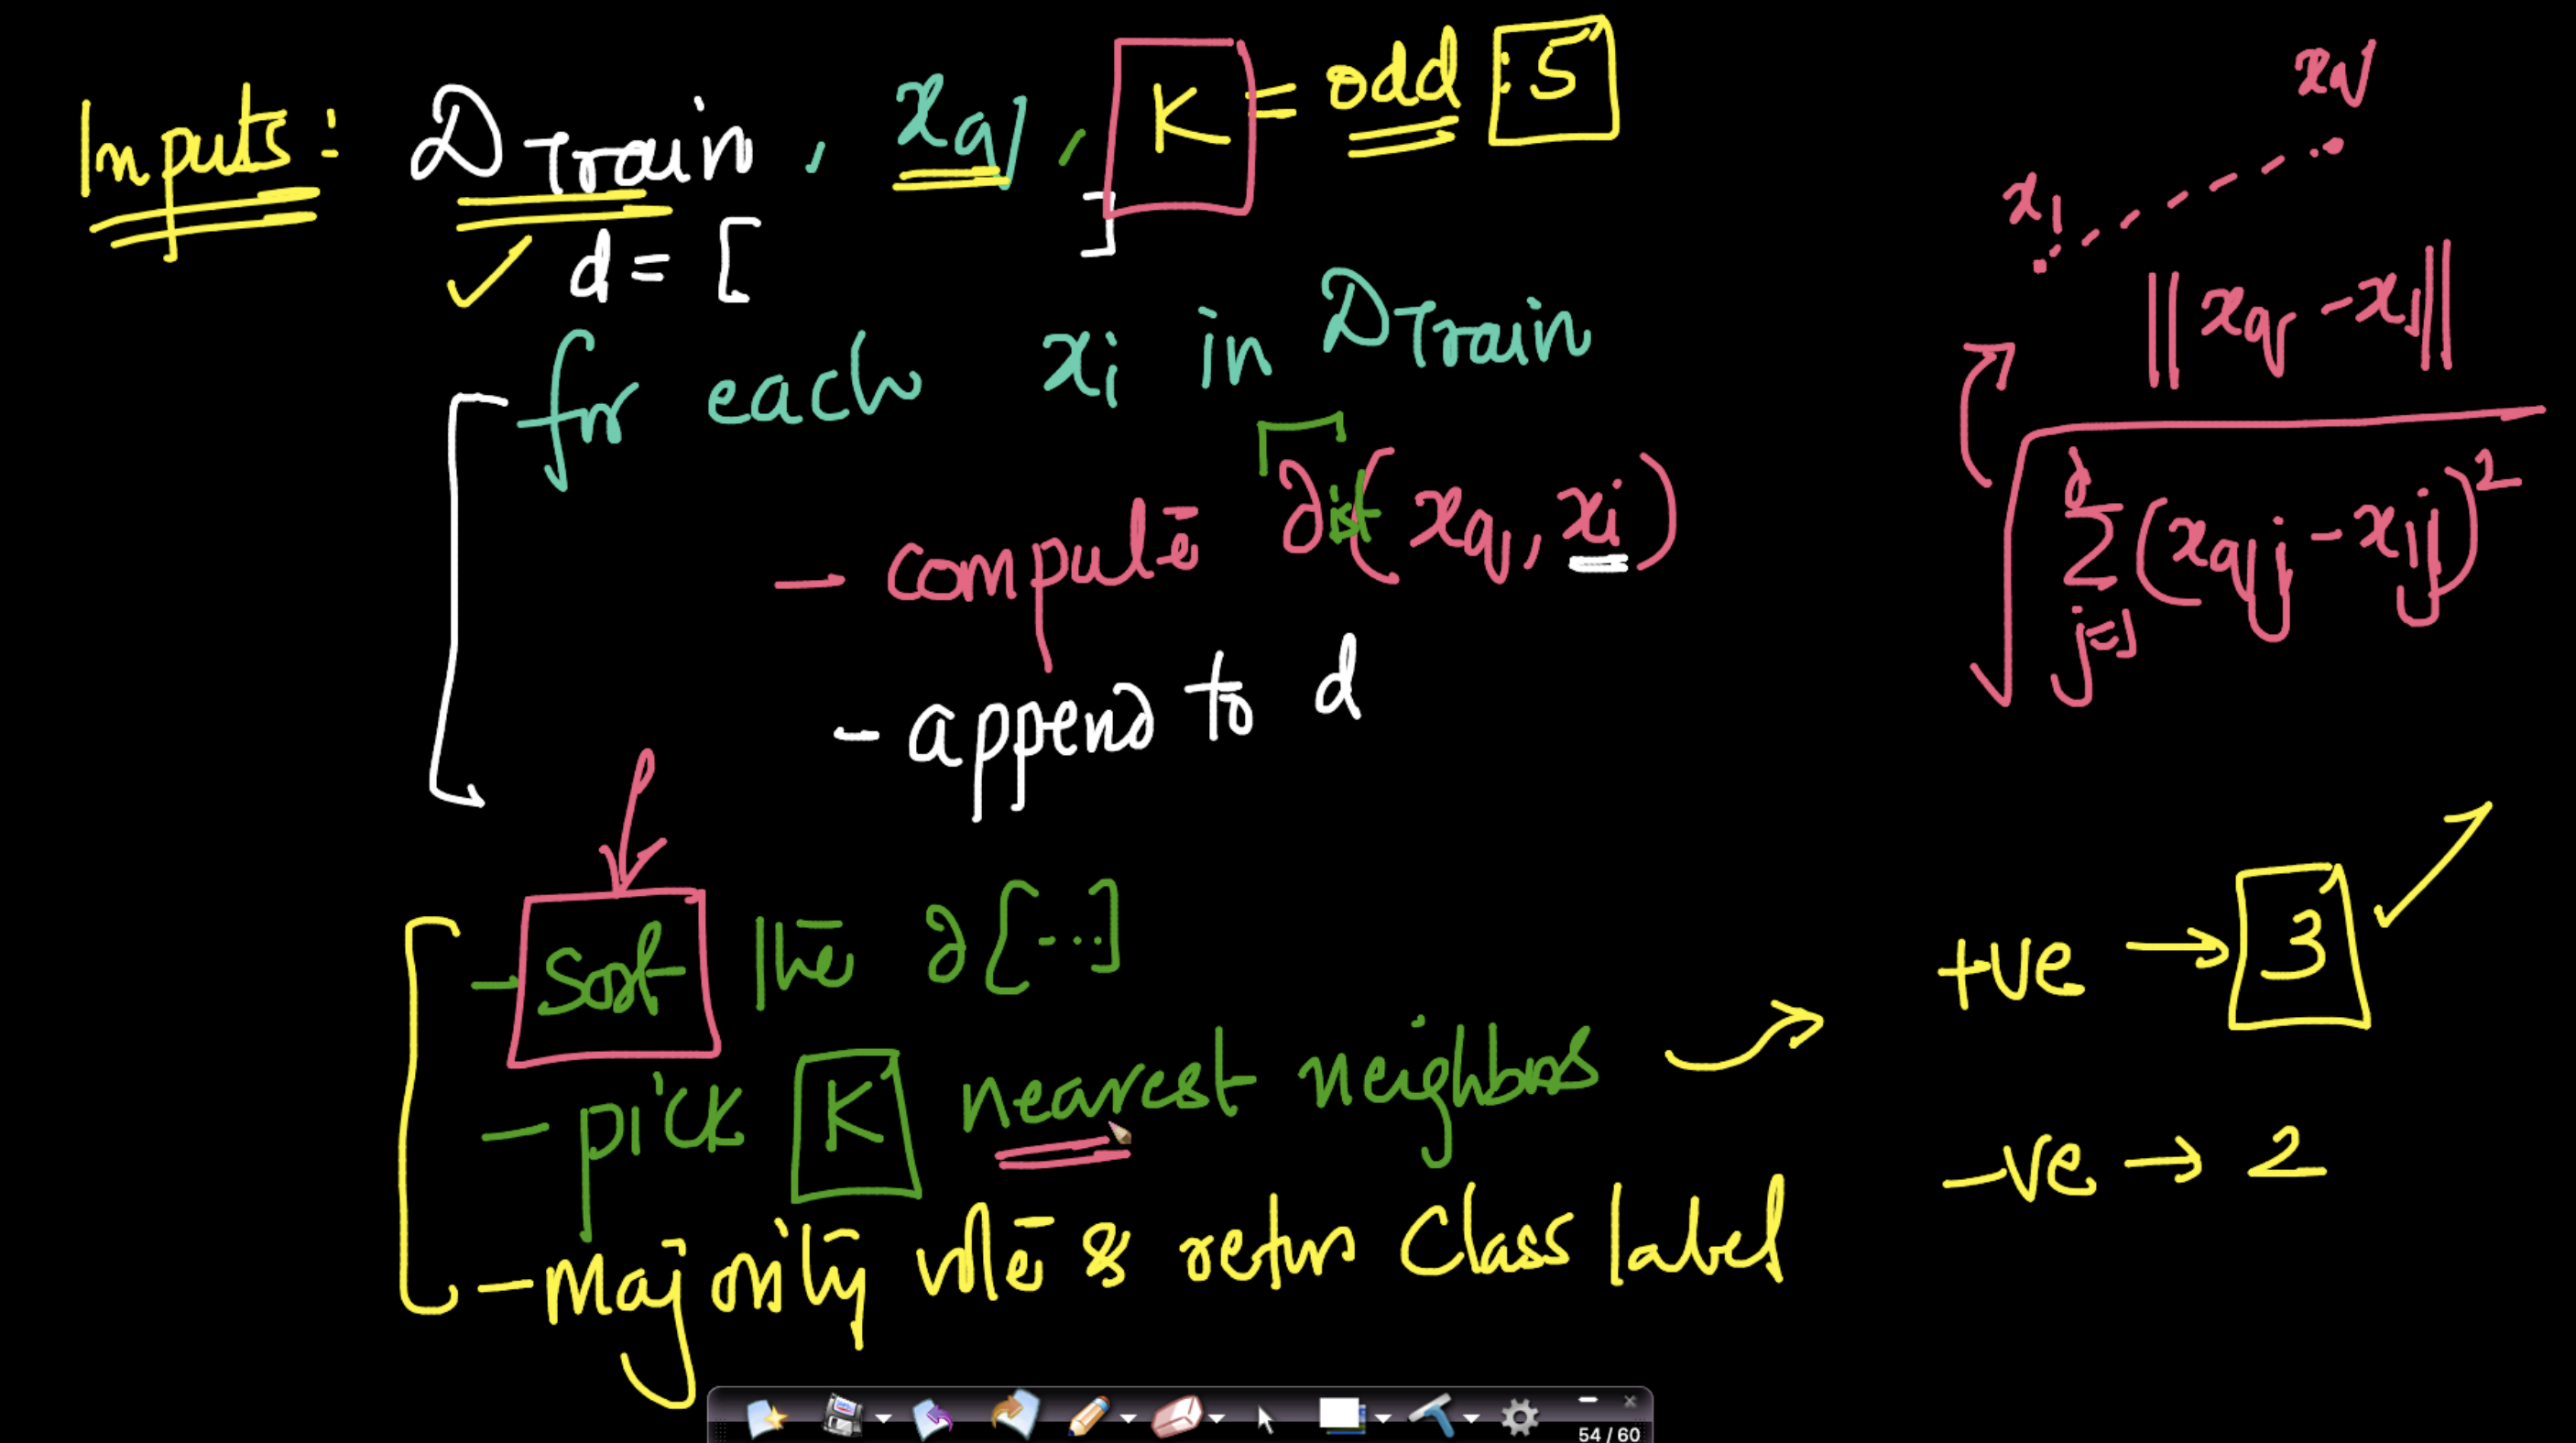

## Distance Metrics
####Q- How do we find the similar users? Which metric to choose?

A - That's again a hyper-parameter metric.

Various distances/similarity metrics can be used


- The most basic distance measure can be done using **Euclidean Distance**
- Which is the sum of the sqaure difference between each of the d-dimensional point of $x_1$ with $x_2$ and take a square root of it.
    - Euclidean $(x_1,x_2) = [ ∑_{j=1}^{j=d} {{ (x _{1j} - x _{2j} )}^2] }^{\frac{1}{2}} $ 


#### But what if value of d becomes too high ?
- Thats where Euclidean Distance fails to work due to something known as Curse of Dimensionality whose maths <font color='red'>we will cover in later lectures.<font>

<font color='red'>Instrcutor notes<font>
- We have already seen the Euclidean and Manhattan distance intuition in pre-read, 
- Hence to be covered quickly

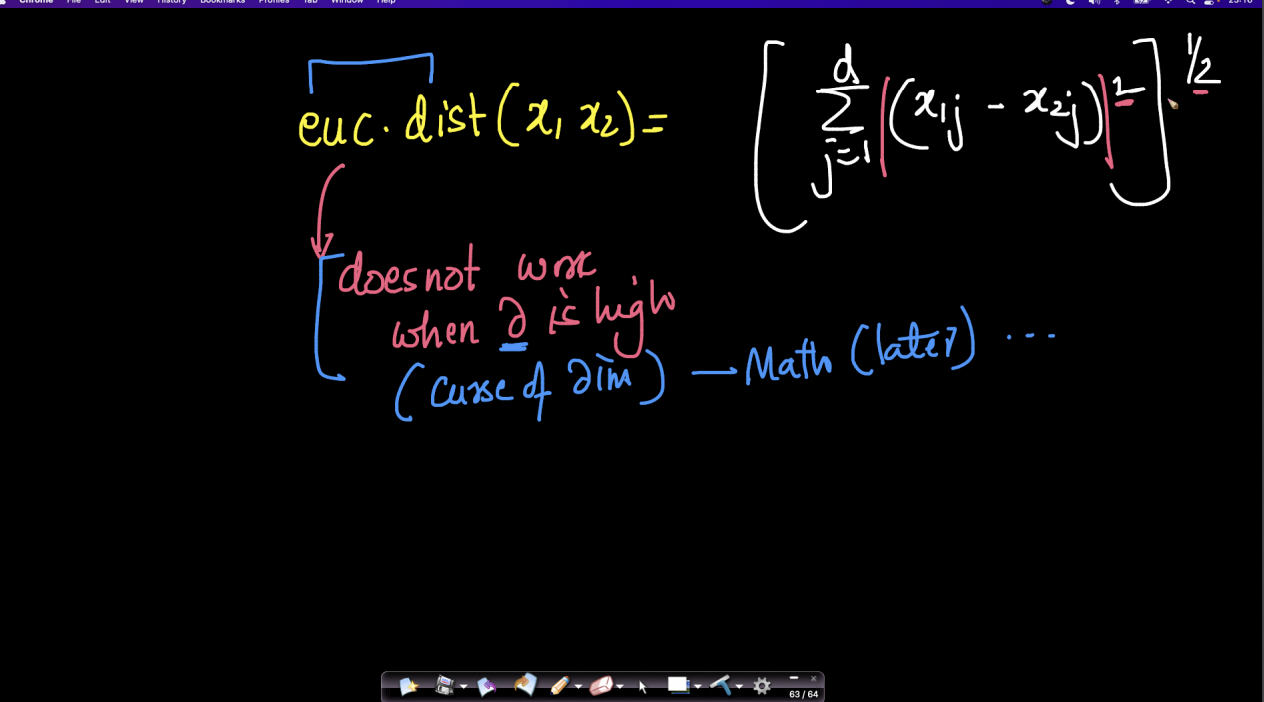

We now look into another distance measure metrics:  Manhattan Distance which is sum of all the absolute difference between each of the d-dimensional point of $x_1$ with $x_2$ 
- Manhattan $(x_1,x_2) = ∑_{j=1}^{j=d} {[{ | x _{1j} - x _{2j} |)}^1] }^{1} $ 

Now lets understand Manhattan, geometrically:

- We know between two feature points $x_1,x_2$, Euclidean distance will be the hypothesis of the right angle triangle

#### What will be the Manhattan Distance ?
- We are adding distance ($d_1$) along one axis (Here feature $f_1$ ) 
- and then the distance ($d_2$)along the other axis (Here feature $f_2$) 
- Now summing up both $d_1$ and $d_2$ gives our Manhattan Distance

Lets understand it more with a grid like example:
- if we want to move from bottom-left point to top-right point,
- We can only move parallel to the axes (is that only up,down, left,right)
- And the closest path through which we can reach the goal point is our Manhattan Distance.

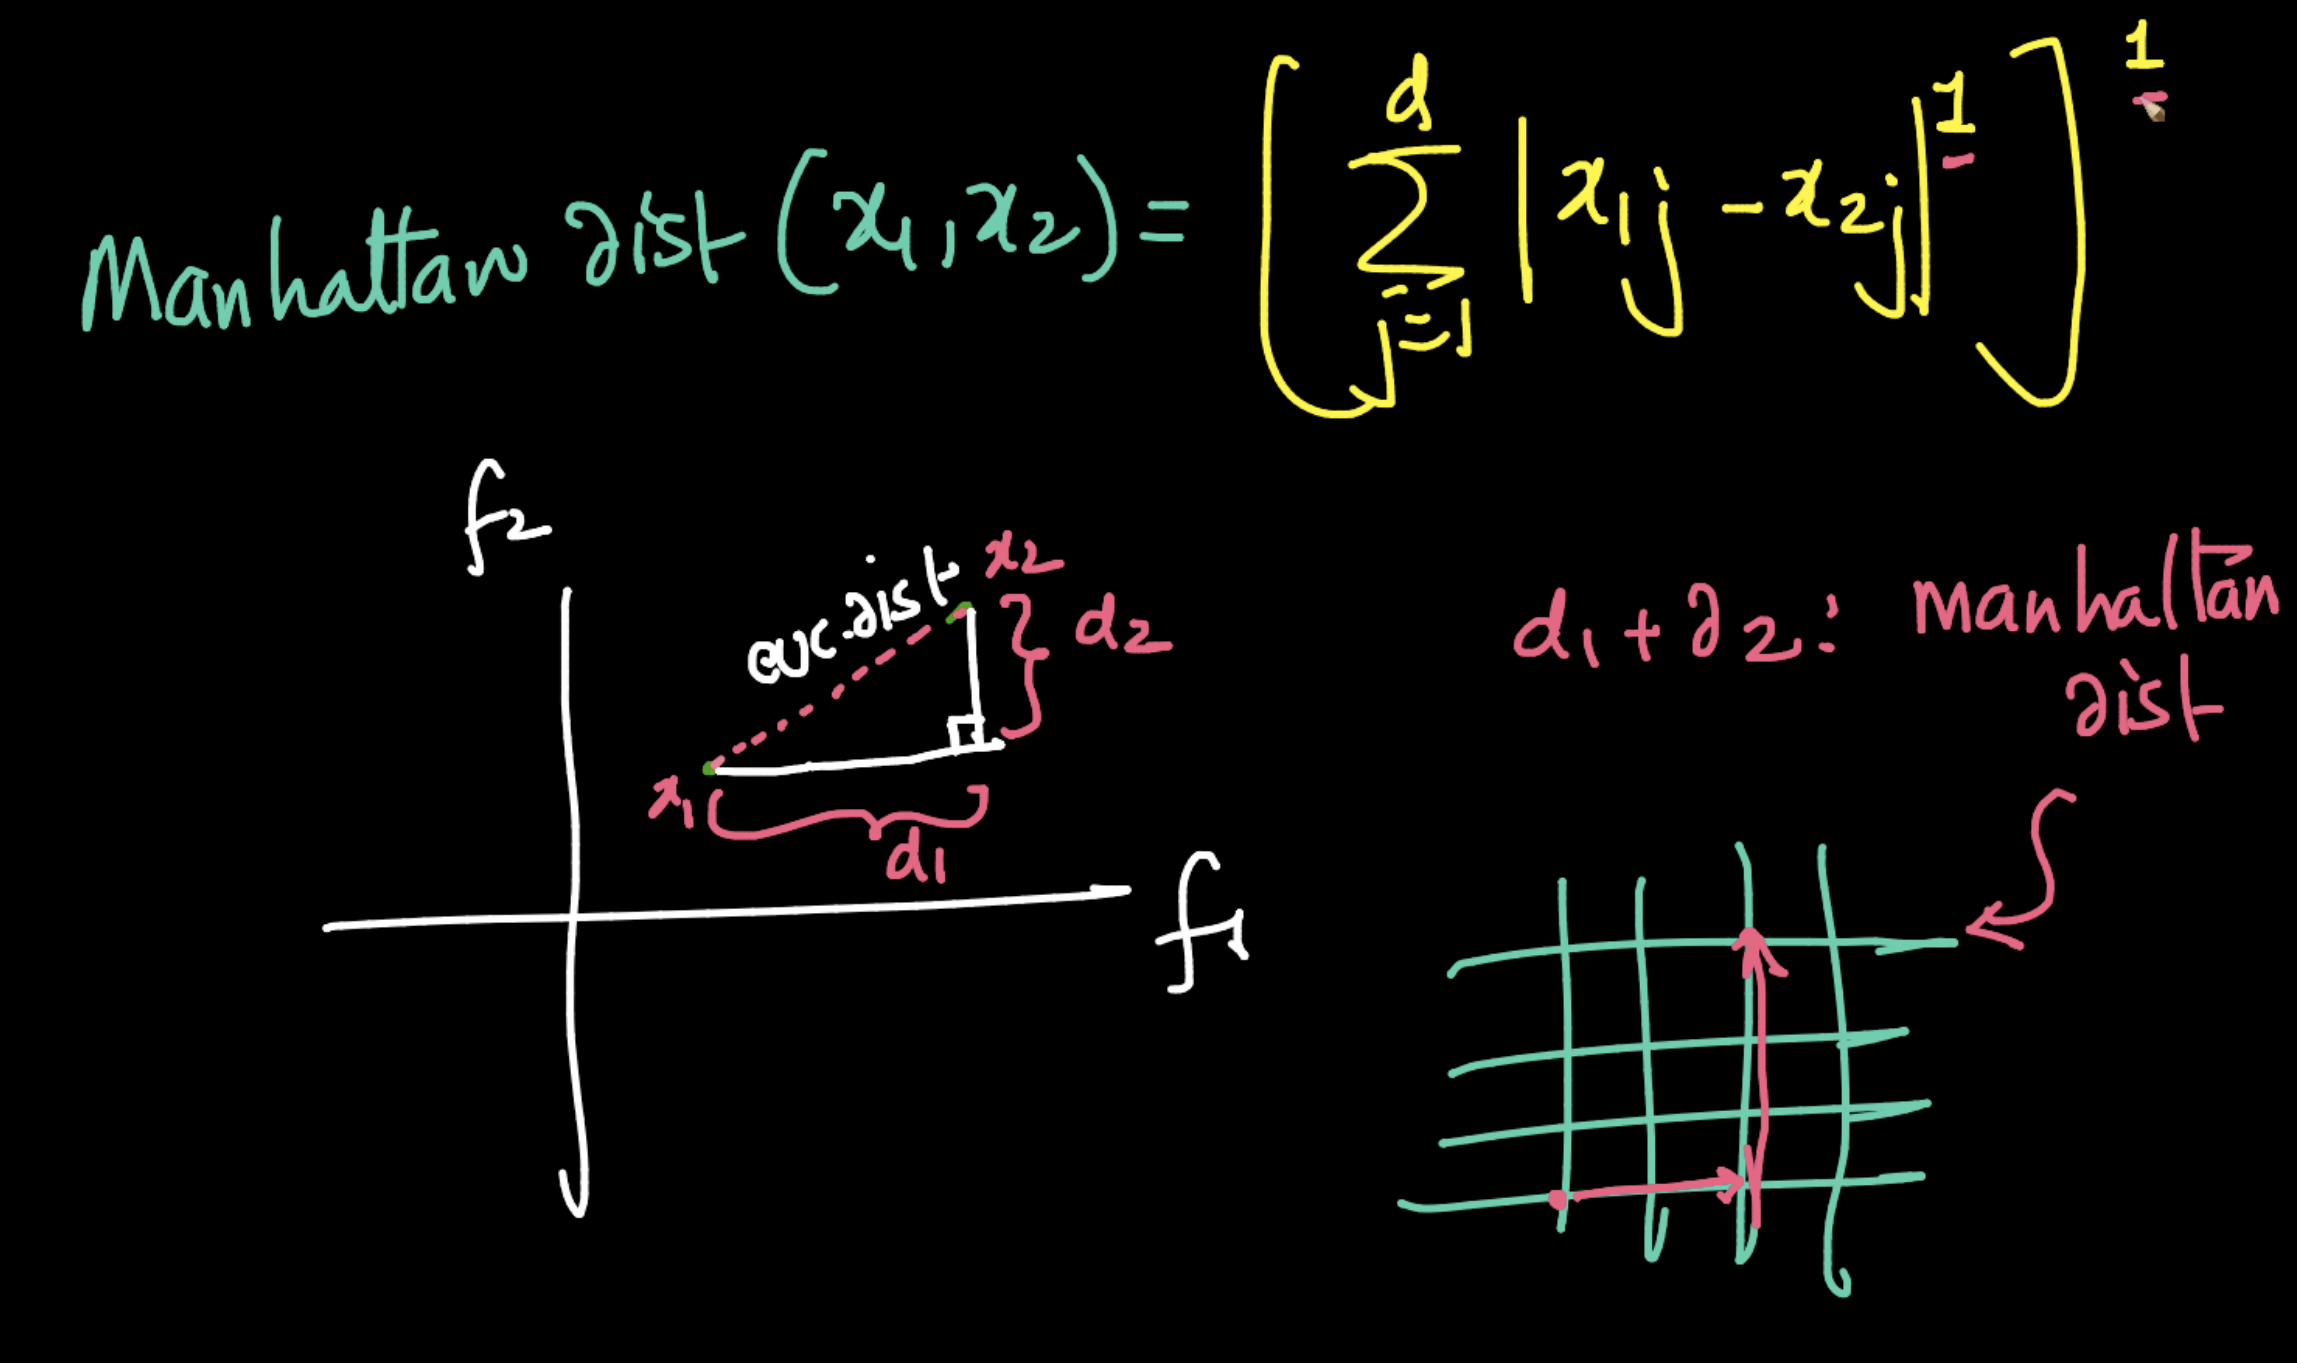

**ASSESSMENT COVERED**

Coding Question

- https://www.scaler.com/hire/test/problem/16082/
- https://www.scaler.com/hire/test/problem/24768/

- If we add Absolute to Euclidean Distance,
    - Since if we remember, $|x|^2$ is same as $x^2$ because:
        - $(-x)^2 = (x)^2 = x^2$
        - and $|x| = ^{+}_{-}x$   
- we notice how Euclidean and Manhattan are very similar and the only difference is in the powers
    - Euc$(x_1,x_2) = ∑_{j=1}^{j=d} {[{ | x _{1j} - x _{2j} |}^2] }^{\frac{1}{2}} $ 

    - Man$(x_1,x_2) = ∑_{j=1}^{j=d} {[{ | x _{1j} - x _{2j} |}^1] }^{1} $ 



## Implimentation of knn



In [ ]:
from sklearn.decomposition import PCA
# reducing features to just 2 features
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X.shape

(267, 2)

In [ ]:
df2 = pd.DataFrame(X, columns=['f1', 'f2'])
df2['y'] = y

df2.head()

f1           f2  y
0 -1536.864538 -3890.155341  2
1 -6951.600822 -5398.876946  2
2 -6264.094692 -6680.220399  2
3  3951.287005 -9483.481680  1
4  8385.399752   -16.996995  1

In [ ]:
print(pca.explained_variance_ratio_)

[0.5058293 0.3499584]


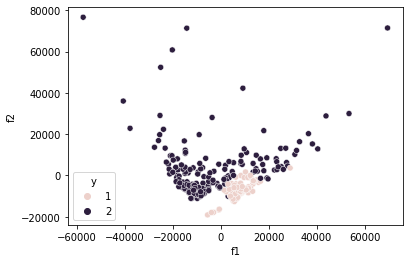

In [ ]:
sns.scatterplot(data= df2, x= 'f1',y = 'f2' , hue = 'y')

Here we can clearly see that the data is non-linearly seperable

Lets now splitting the data into train and test set by considering into these two features 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2[['f1', 'f2']].values,\
                                                    df2['y'].values,\
                                                    test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 2) (200,)
(67, 2) (67,)


Standardization of data 

In [ ]:
mu = X_train.mean(axis=0)
sig = X_train.std(axis=0)

In [ ]:
X_train = (X_train-mu)/sig
X_test = (X_test-mu)/sig

kNN Implementation from Scratch

In [ ]:
def dist(x1,x2):
    """Euclidean distance between 2 vectors"""
    return np.sqrt(np.sum((x1-x2)**2))

# Test Time 
def knn(X,Y,queryPoint,k=5):
    """Predict the class label for the query point"""
    
    distances = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        distances.append((d,Y[i]))
        
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]
    
    distances = np.array(distances)
    
    #print(distances)
    
    classes_counts = np.unique(distances[:,1],return_counts=True)
    #print(classes_counts)
    
    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]
    
    return int(pred)

taking the 100th test data as our $x_q$

In [ ]:
X_test[50]

array([ 0.51430645, -0.65034603])

Predicted class label for $x_q$

In [ ]:
knn(X_train, y_train, X_test[50])

1

Actual label for $x_q$

In [ ]:
y_test[50]

1

- notice that our model performed predicted the labels correctly

- Now lets see the accuracy of our KNN on test data

In [ ]:
y_pred = np.zeros(X_test.shape[0])

for i in range(X_test.shape[0]):
    y_pred[i] = knn(X_train, y_train, X_test[i])

print(f'Accuracy :{round(100*(y_pred == y_test).sum()/y_pred.shape[0], 2)}')

Accuracy :95.52


- We see how our KNN model performed quite well.

### KNN using Sklearn 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Train, Validation, Test Split

In [ ]:
X_tcv, X_test, y_tcv, y_test = train_test_split(df2[['f1', 'f2']].values, df2['y'].values,test_size=0.20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tcv, y_tcv,test_size=0.20, random_state=42)

In [ ]:
print(f'Training data: {X_train.shape}, {y_train.shape}')
print(f'Validation data:{X_val.shape}, {y_val.shape}')
print(f'Test data:{X_test.shape}, {y_test.shape}')

Training data: (170, 2), (170,)
Validation data:(43, 2), (43,)
Test data:(54, 2), (54,)


In [ ]:
knn = KNeighborsClassifier(metric='euclidean')

knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

Accuracy of KNN on Test data

In [ ]:
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.9629629629629629

Precision, Recall, F1-Score of KNN on test data 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       0.95      1.00      0.98        41

    accuracy                           0.96        54
   macro avg       0.98      0.92      0.95        54
weighted avg       0.96      0.96      0.96        54



Confusion Matrix of KNN on Test Data

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,index = np.unique(y_test), columns = np.unique(y_test) )

cm_df.head()

1   2
1  11   2
2   0  41

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x576 with 0 Axes>

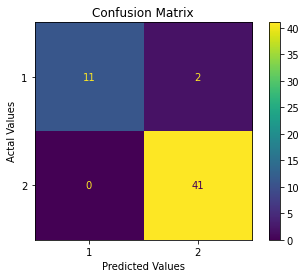

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(knn,X_test,y_test)
#sns.heatmap(cm_df, annot=True,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Assessment Covered**
- https://www.scaler.com/hire/test/problem/15899/

## Weighted KNN

#### Question: What if we take K as even number, such that we have 2 +ve class labels and 2 -ve class labels as top 4 neighbors?
- This can make the predictions wrongs, hence as a rule of thumb we tend on taking only odd values of K 

Even with an Odd value of K:  

- If we have K = 5, 
    - we have 2 -ve datapoints very close to  $x_q$ 
    - and 3 +ve datapoints far off of $x_q$.  

- According to Majority vote, $x_q$ will belong to class +ve 
- even though, -ve class datapoints are close to the $x_q$

#### How can we avoid KNN model to not make such wrong predictions?
- By manupilating with value of K 

#### But what if we can only take K = 5 ?
- till now, we have given same weightage to each K datapoints
- Now lets give weightage as inverse of Distance ($ {Weight} =  \frac{1}{distance} $)
- hence points closer to $x_q$ now have higher weights (=10) than weights(=2) for points further away 
- Now if we take a weighted sum of all class labels:
    - -ve class labels will have weight = (10+10) =  20
    - +ve class labels will have weight = (2+2+2) = 8

- Now $x_q$ will be predicted as -ve class data point.

This way of using weights to find the class label for $x_q$ is what Weighted KNN is all about.




We simple allow it to be a part of any of the classes at random.

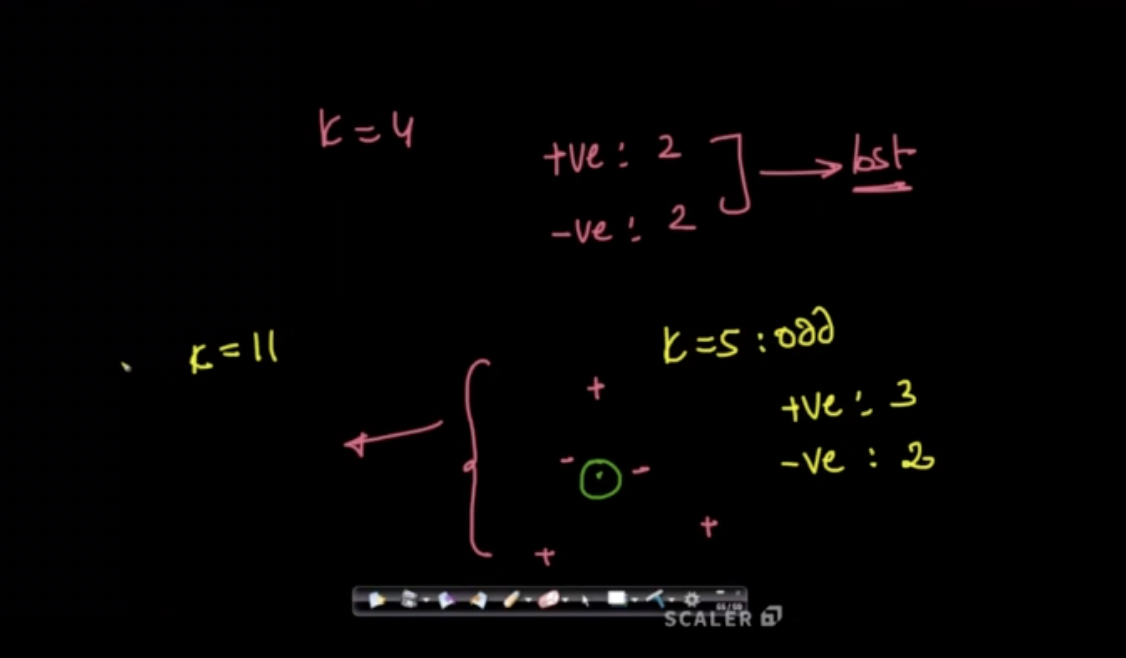

In [ ]:
w_knn = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='euclidean')
w_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [ ]:
y_pred = w_knn.predict(X_test)
w_knn.score(X_test, y_test)

0.9629629629629629

Precision, Recall, F1-Score of KNN on test data 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       0.95      1.00      0.98        41

    accuracy                           0.96        54
   macro avg       0.98      0.92      0.95        54
weighted avg       0.96      0.96      0.96        54



**ASSESSMENTS COVERED**
- https://www.scaler.com/hire/test/problem/18036/ 

#### Question: What if we take K=5, and we have all the +ve and -ve class labels datapoints  equidistant from $x_q$, then how KNN predicts class label for $x_q$ ?
- KNN uses random choice here, where it can pick either of the +ve or -ve class label for $x_q$

- Or we can manupilate the value of K 

- Though such cases are very rare to happen 

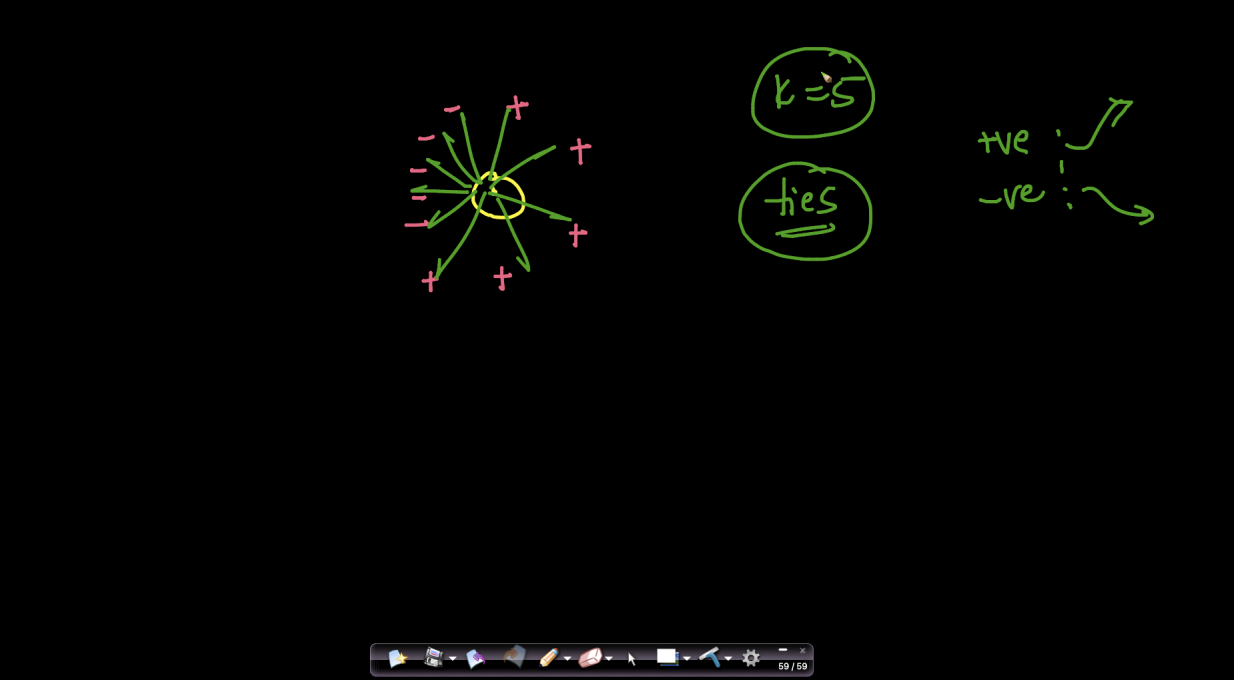

**ASSESSMENTS COVERED** 
- https://www.scaler.com/hire/test/problem/15900/

- https://www.scaler.com/hire/test/problem/16457/


## Assumption of KNN: 
- just like we saw how in Logistic Regression, an assumption a linearly separable hyperplane exists, 

- Similarly, The KNN algorithm assumes that similar datapoints exists in close neighborhood. 
- In other words, Neighborhoods are homogeneous is that, similar things are near to each other




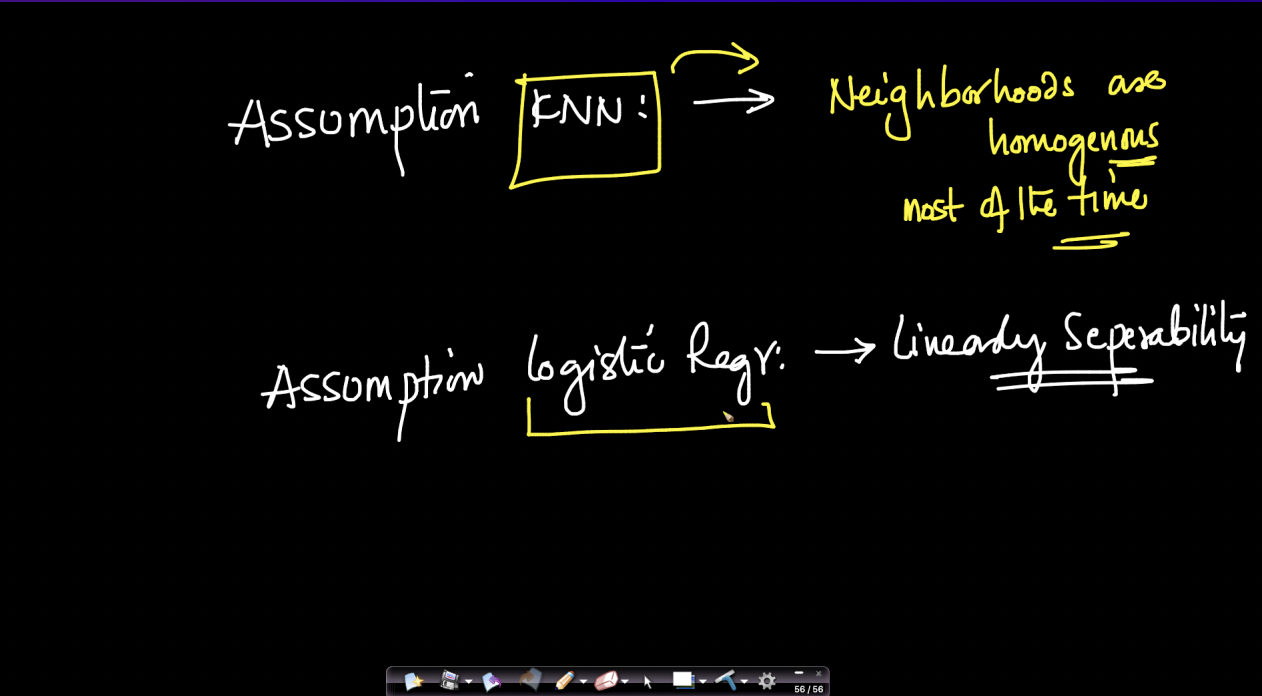

## Time-Complexity of KNN




- we all have learnt searching and sorting algorithms, but fail to understand where to use them. 
- if we look closely, KNN uses sorting algorithms so to quickly have a sorted distanc vector $d$.



Supposedly we have n samples (datapoints) and each datapoint is d-dimensional


#### What will be the time complexity to run KNN on one test point $x_q$ ?

1. we find distance of all datapoints {$x_1,x_2,..x_i,..,x_n$} with respect to  $x_q$
    - the time complexity will be : $O(n.d)$

2. we then sort the distance vector $D$ 

#### which sorting algorithms can we use which has minimum time complexity ?
- Merge Sort, time complexity being $O(nlogn)$

3. Now we select K-top points on the distance vector and the time complexity becomes $O(K)$



So our overall test-Time-Complexity for KNN becomes $O(nd+nlogn+K)$

- since K is a very small value as compared to n and d,  we can neglect it
- Now our Complexity becomes $O(n(d+logn) )$


Now lets understand what will be the Space-complexity for KNN
- n samples (datapoints) and each datapoint is d-dimensional and we select top K points
- So Space-Complexity becomes : $O(n.d + K.d)$
- but K is very small, hence we neglect K.d 
-  Now the Space-Complexity becomes $O(n.d)$

We have been talking about,
- How can we calculate distance between $x_q$ and the other datapoints $x_i$


This is a BRUTE-FORCE Algorithms, And we can see how much of a memory and time this Brute-Force KNN algorithm requires. 
- this becomes a major disadvantage for KNN

- But there are State of Art models (SOTA) which are bleeding edge KNN algorithms
    - [Google ScaNN: Efficient Vector Similarity Search](https://ai.googleblog.com/2020/07/announcing-scann-efficient-vector.html)
    - [Facebook Faiss](https://engineering.fb.com/2017/03/29/data-infrastructure/faiss-a-library-for-efficient-similarity-search/)

#### What about the train complexity for KNN ?
- If you noticed, we do not train KNN models.
- we just have some Training data on which we put our test data $x_q$.
- So the time complexity for training data becomes $O(1)$



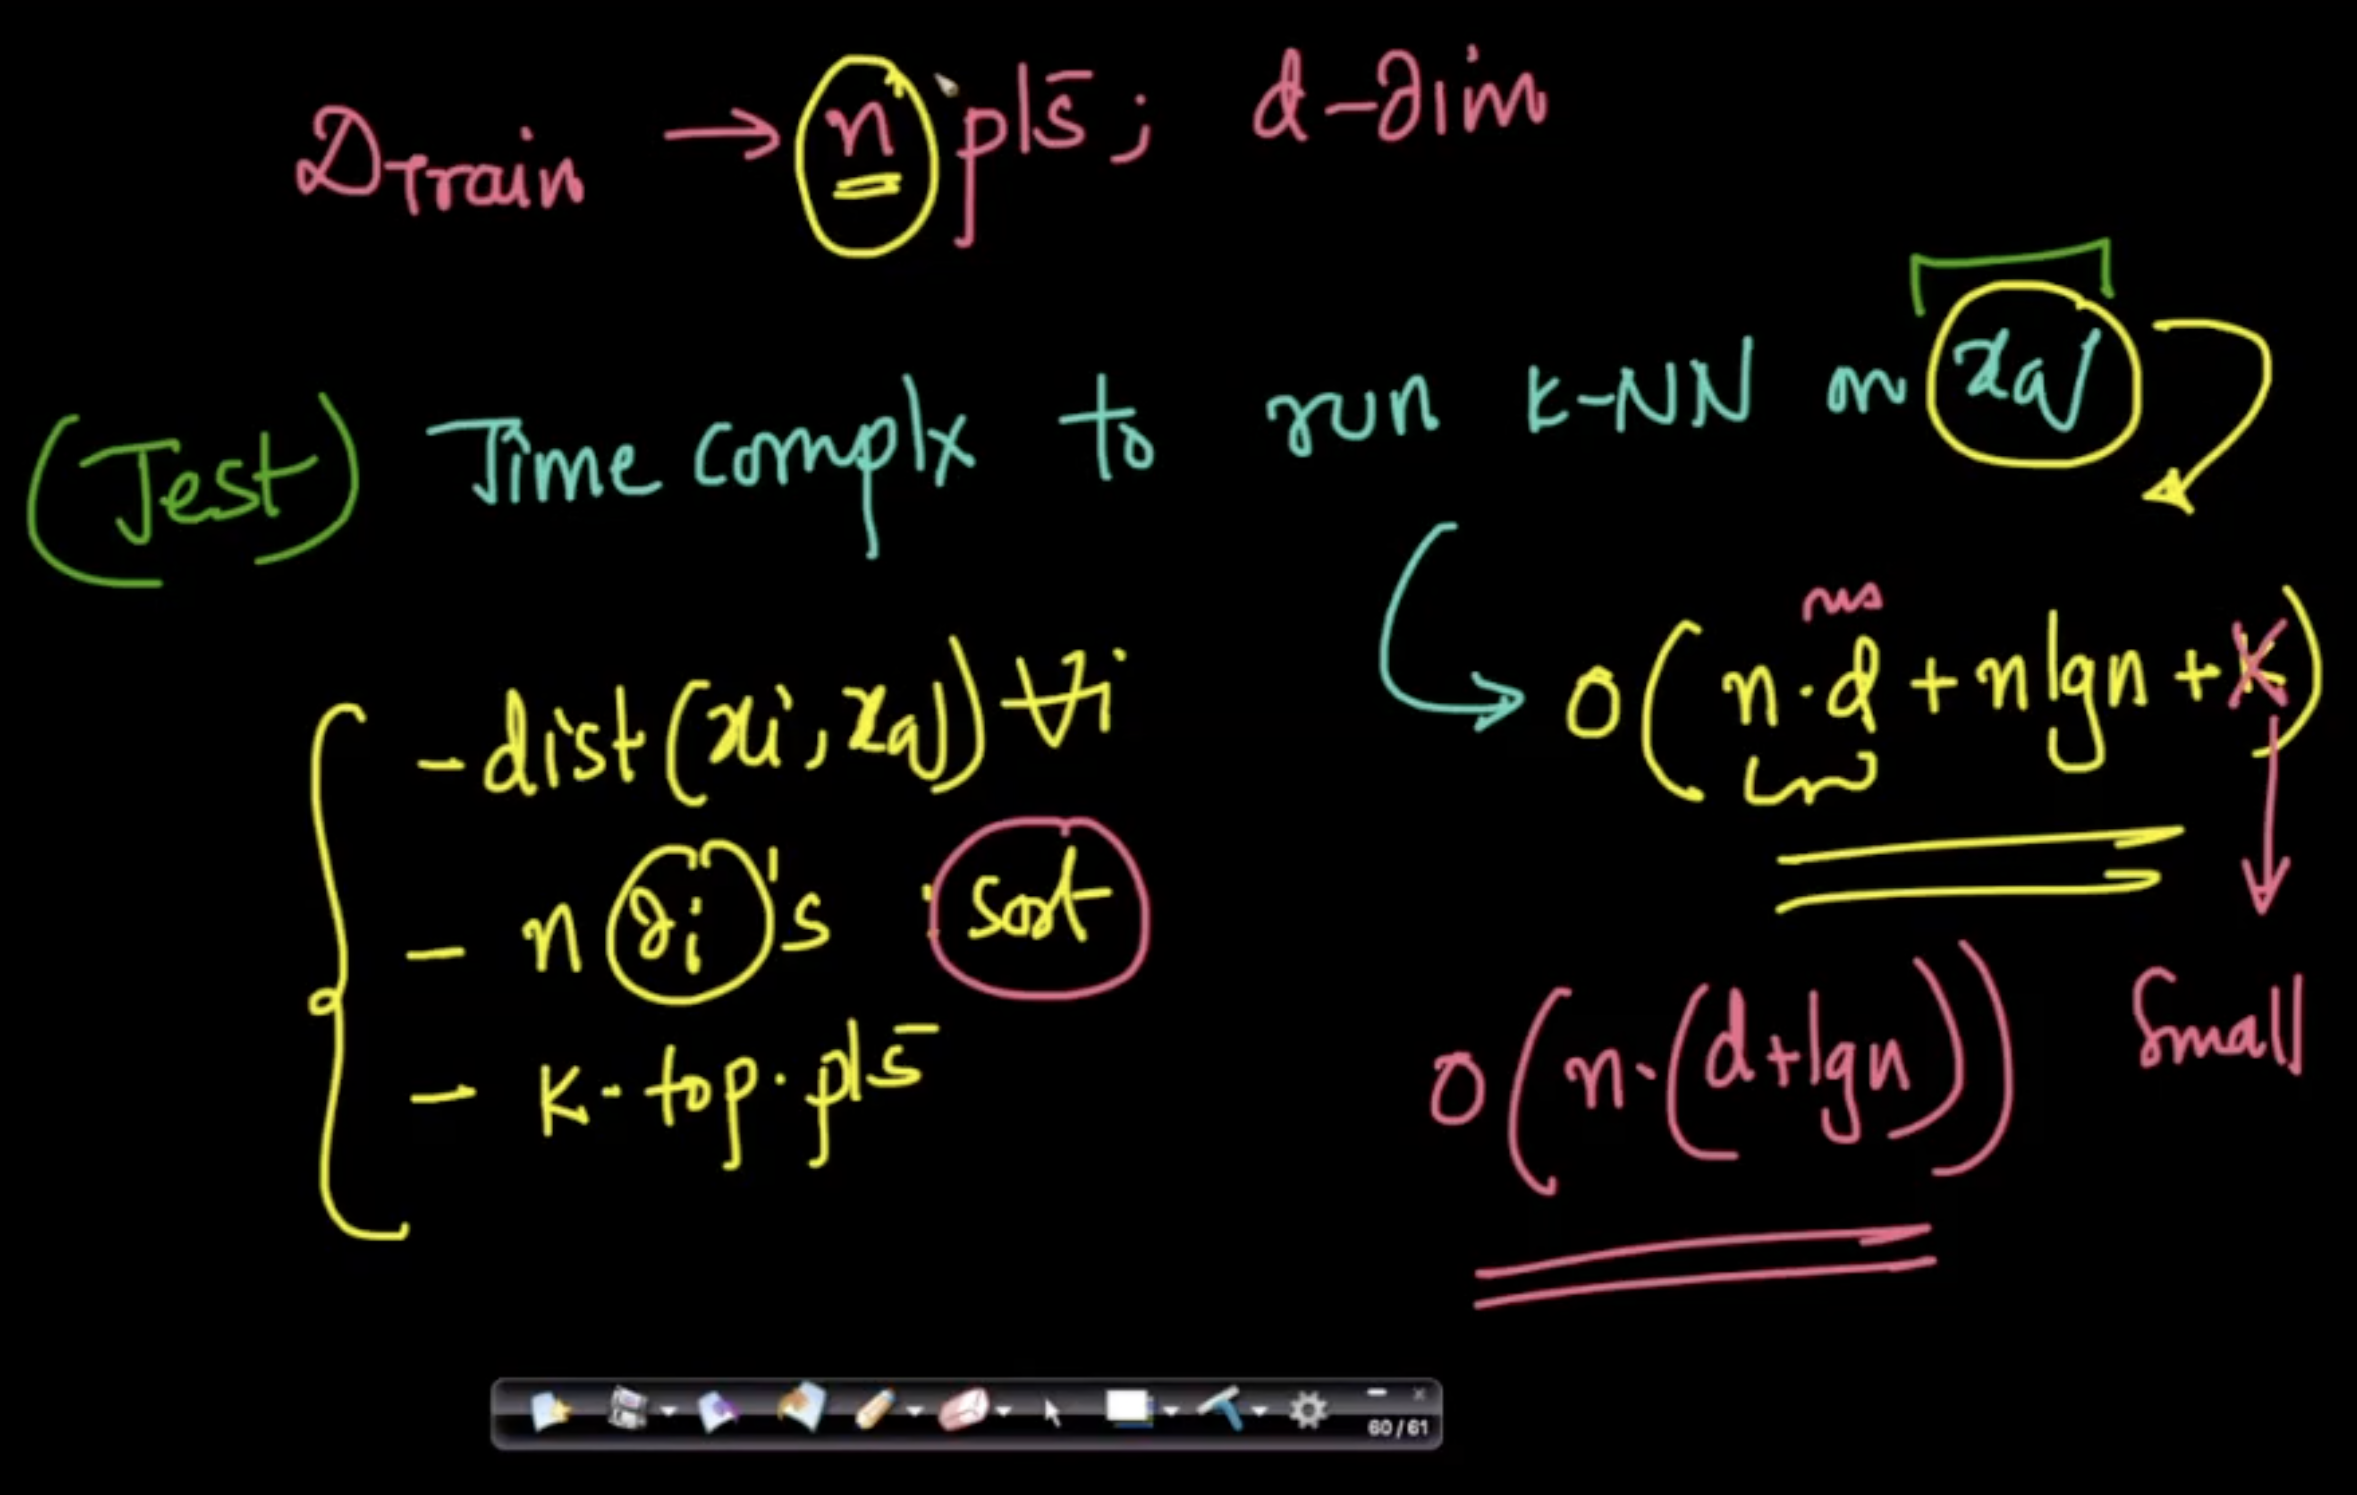

**Assessment Covered**
- https://www.scaler.com/hire/test/problem/15857/ 

- https://www.scaler.com/hire/test/problem/20423/

**QUIZ**

k-NN algorithm does more computation on test time rather than train time.

1. TRUE
2. FALSE 


**Answer:** 

1. True

**Explanation**

- The training phase of the algorithm consists only of storing the feature vectors and class labels of the training samples.

- In the testing phase, a test point is classified by assigning the label which are most frequent among the k training samples nearest to that query point – hence higher computation.

## Bias-Variance Trade Off in KNN


If we remember that, No training is involved in KNN, 
#### how do we control the bias-Variance trade-off ?
- The only hyper-parameter tuning possible with KNN is K parameter.

Lets assume $K=1$, and we have two test data
1. One close to the +ve noise/outlier 
2. Other close to the -ve noise/Outlier

#### What will be the class label for both the test data ?
- Clearly, it will be same as the class label of the outlier



This means, when the value of K is too low, KNN is fiting to the noise or getting impacted by the noise/ outliers, hence our KNN model is Overfitting


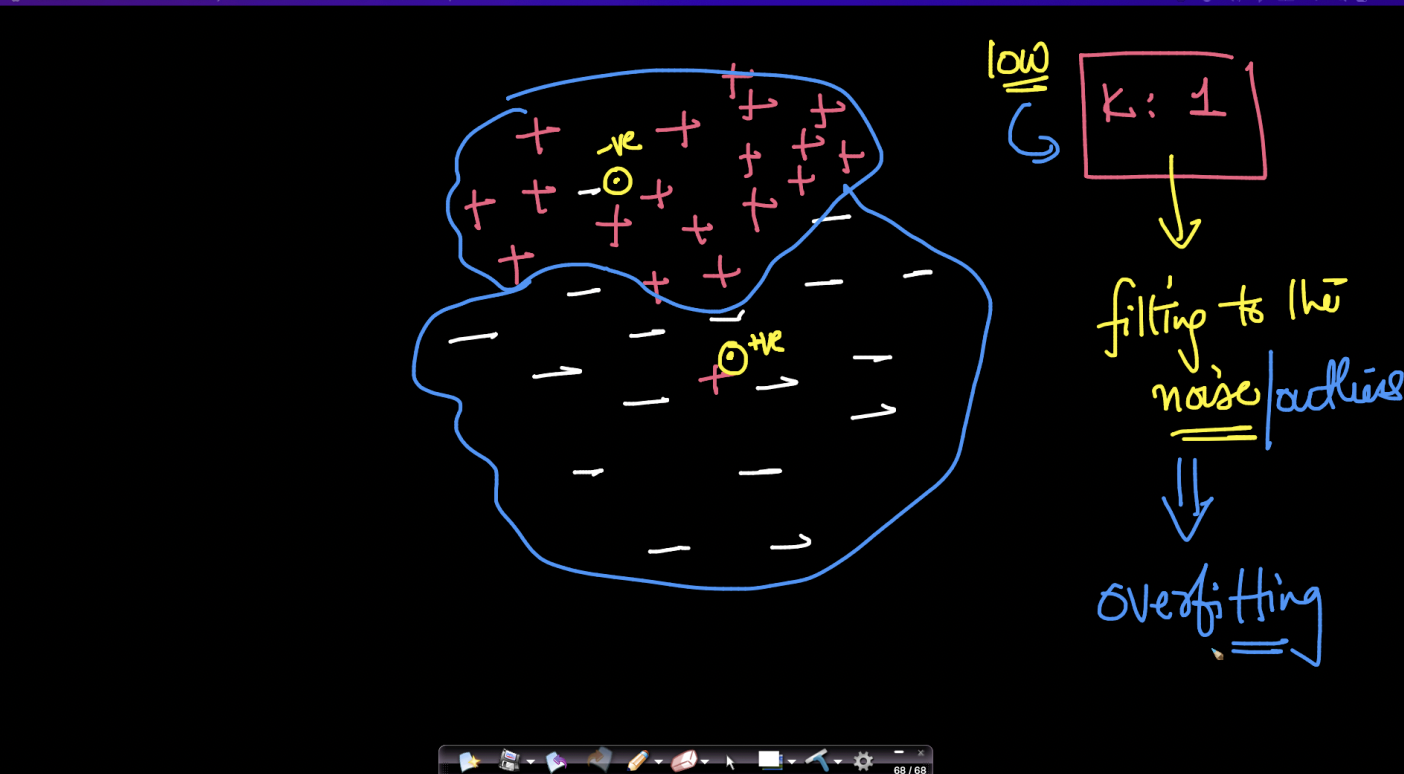


Now Lets consider K as a very large value, $K=101$, and training data 
- has 61 datapoints as +ve label  - has 40 datapoints as -ve label

#### What will be the class label for any test datapoint ?
- No matter where the test datapoint is, the KNN model will always be predict the test datapoint as +ve class label. 


This means, when the value of K is too high, KNN is Underfitting-


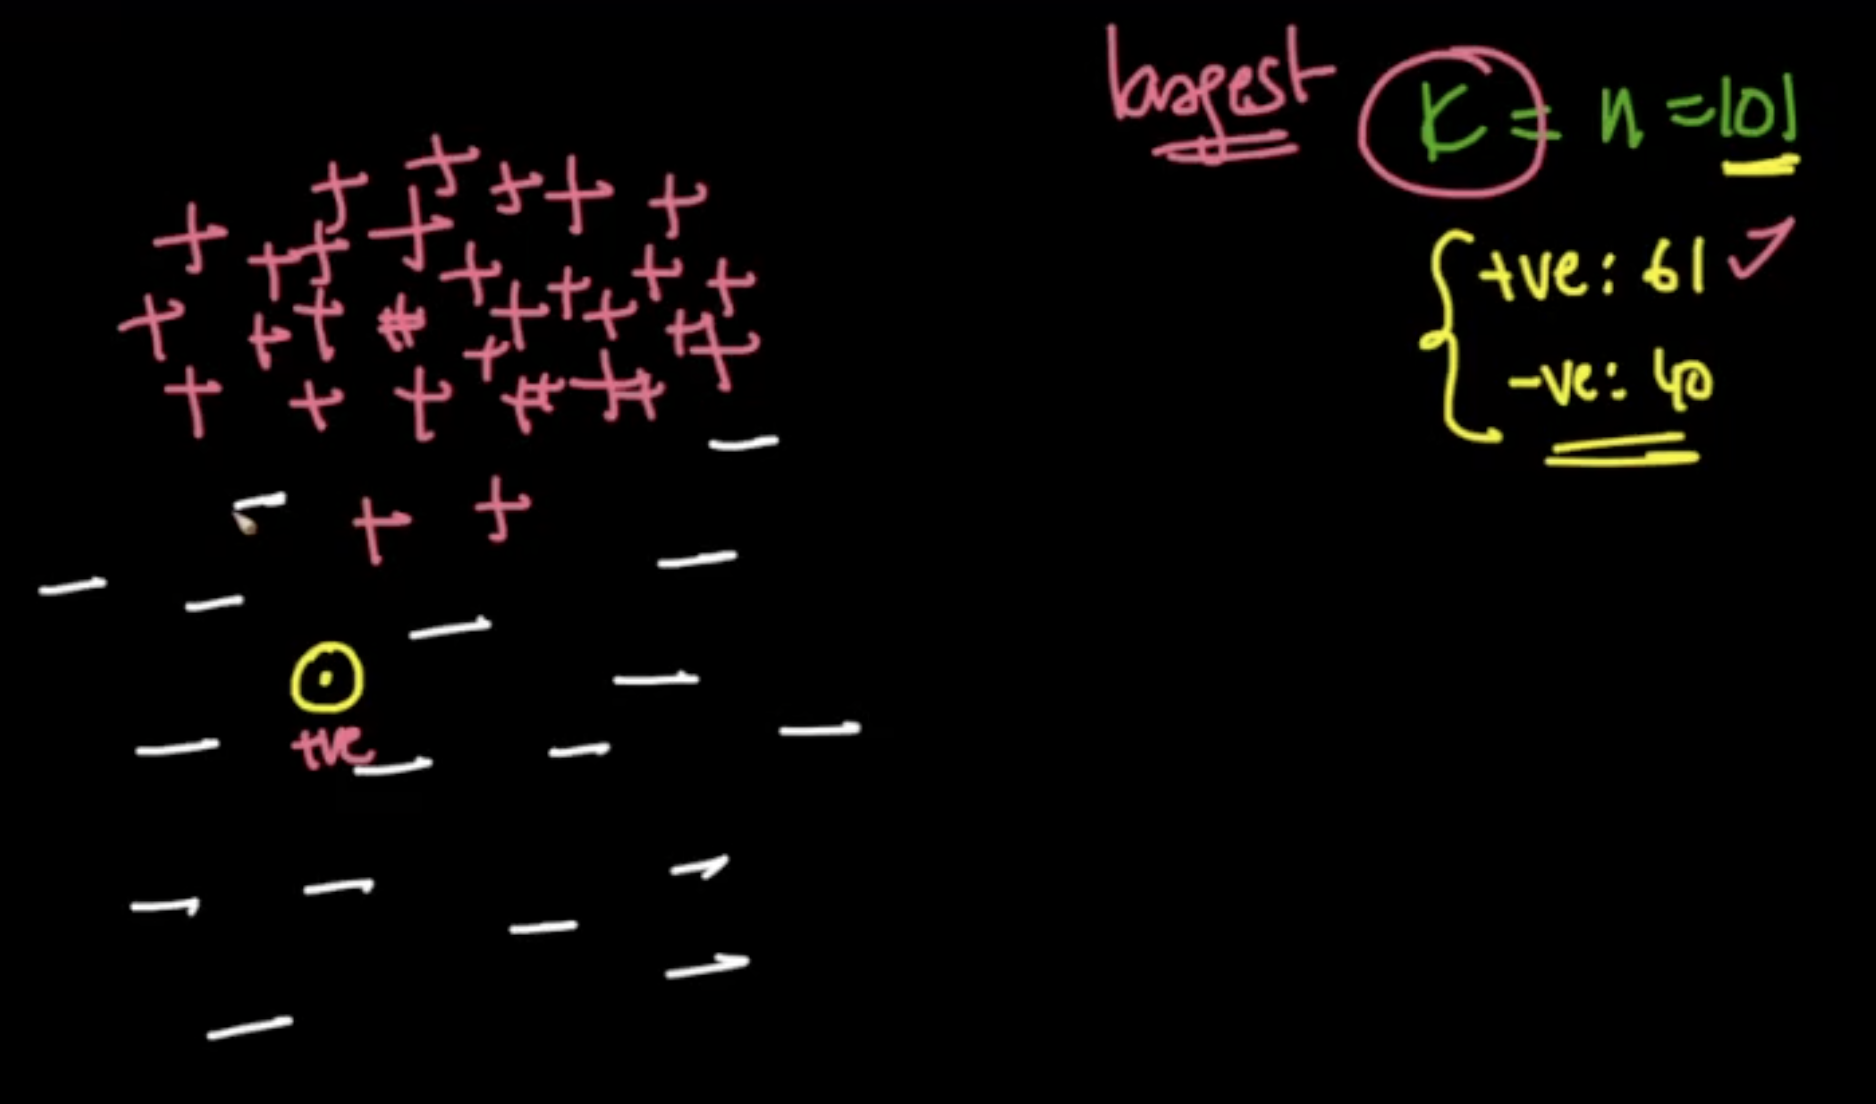

**QUIZ-2**

Which of the following will be true about k in k-NN in terms of Bias and Variance ?

1. When you increase the k the bias and variance will increase 

2. When you increase the k the bias increases and variance decreases

3. When you increase the k the bias decreases and variance increases

4. When you increase the k the bias  and variance will decrease

**ANSWER**
- large K means underfit model which has high bias with less variance.


Now if plot error or any loss metrics and changing K Hyperparameter,
- We see how error is very high when KNN is overfitting and underfitting

- Hence, we pick that K ($K_{best}$) where errors is minimum 


NOTE: we do all of this hyperparameter on our Validation data.



**QUIZ**

```
Which of the following will be true about k in k-NN in terms of Bias and Variance ?

1. When you increase the k the bias and variance will increase 

2. When you increase the k the bias increases and variance decreases

3. When you increase the k the bias decreases and variance increases

4. When you increase the k the bias  and variance will decrease
```

**ANSWER**
- large K means underfit model which has high bias with less variance.


**ASSESSMENTS COVERED**
- https://www.scaler.com/hire/test/problem/30105/
- https://www.scaler.com/hire/test/problem/15898/

- https://www.scaler.com/hire/test/problem/16456/

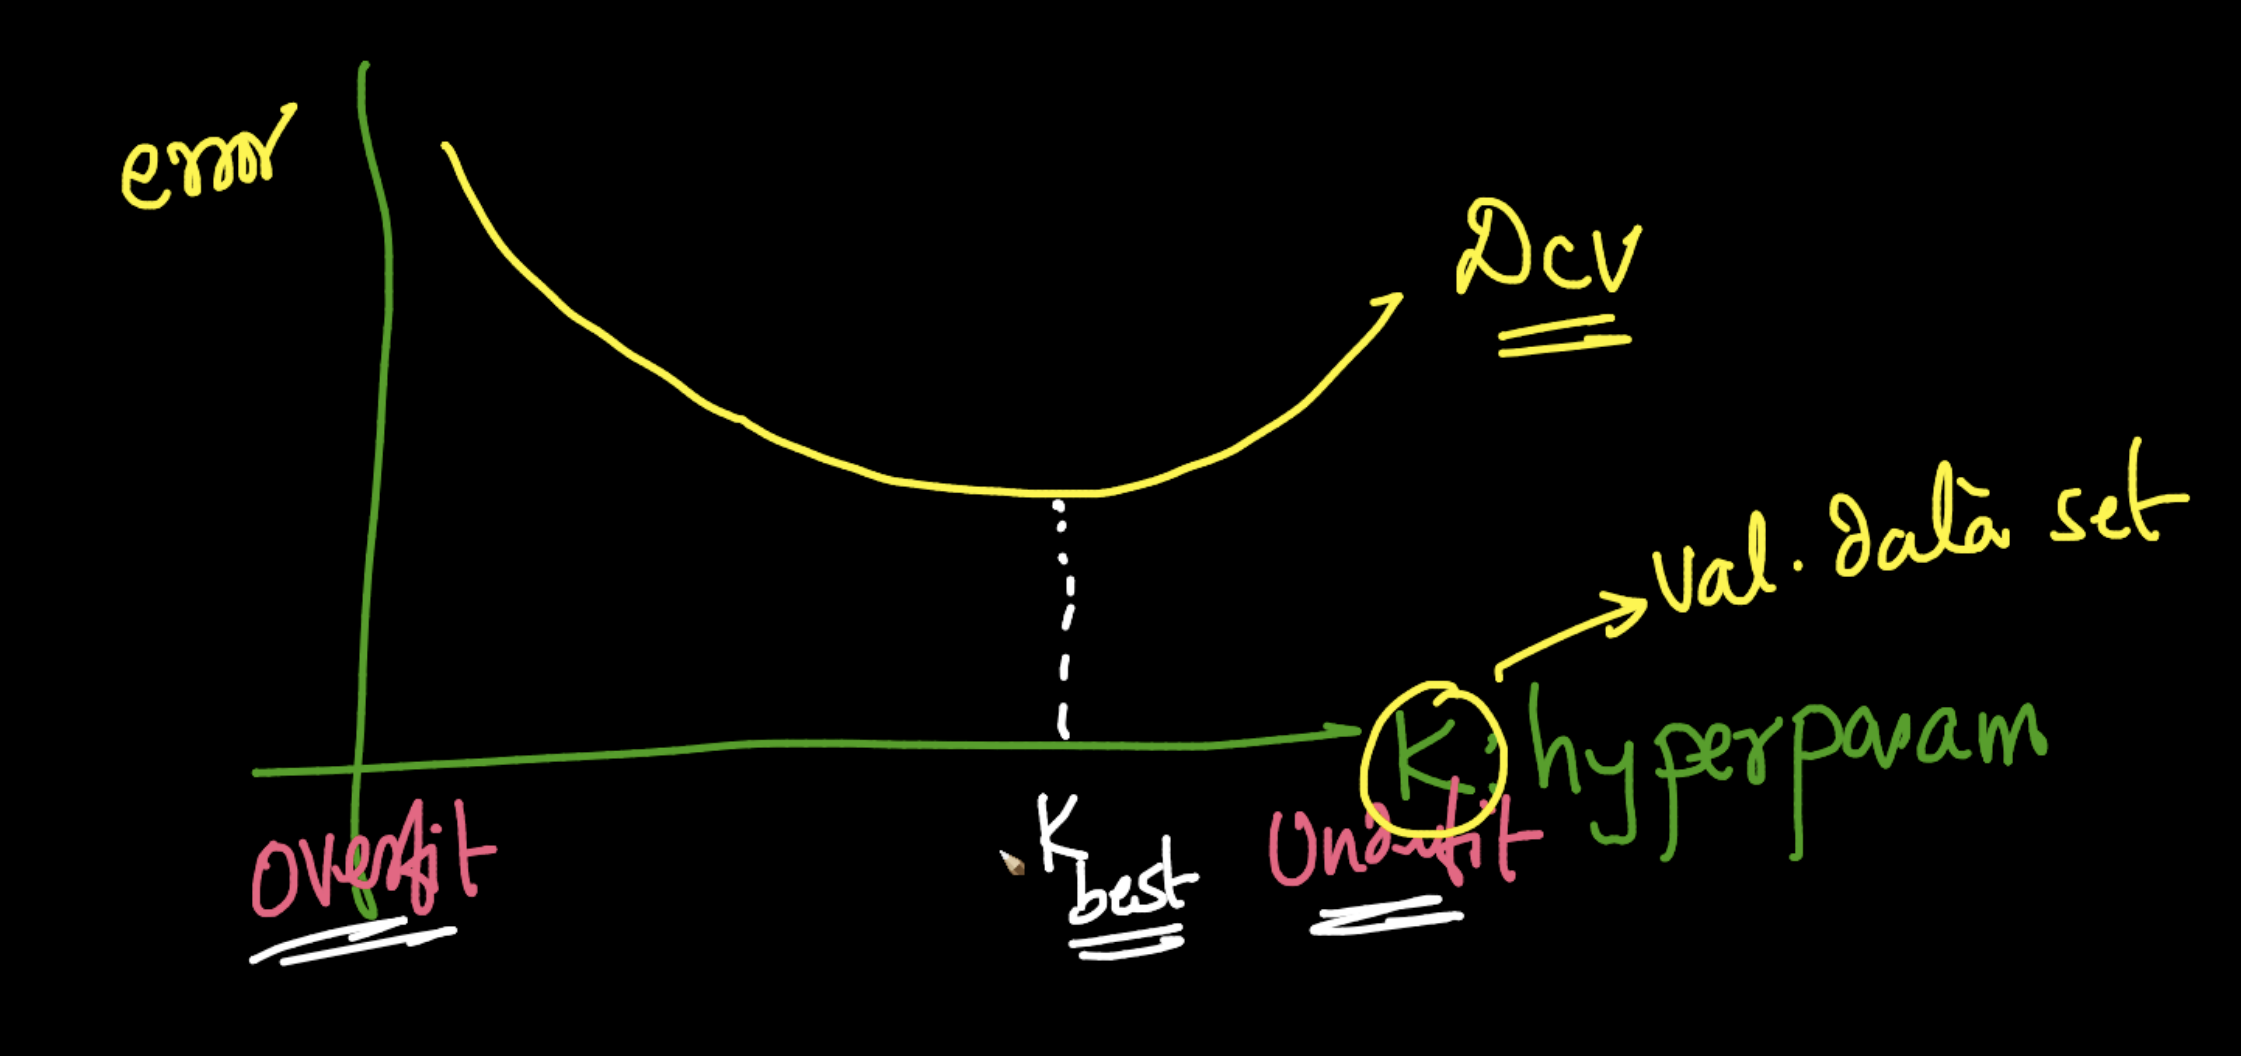

**QUIZ**

Which of the following option is true about k-NN algorithm?

1. It can be used for classification
2. It can be used for regression
3. It can be used in both classification and regression 

**ANSWER**: 
3. It can be used in both classification and regression 

**EXPLANATION**
We can also use k-NN for regression problems. In this case the prediction can be based on the mean or the median of the k-most similar instances.

**ASSESSMENTS COVERED**
- https://www.scaler.com/hire/test/problem/16455/



- https://www.scaler.com/hire/test/problem/15860/ (hold)



CODING QUESTION:
- https://www.scaler.com/hire/test/problem/25269/ 

**QUIZ**

```
KNN gets 100% accuracy on training data. But when the model was deployed on client side, the model performed poorly. Which of the following thing might gone wrong?

1. Very small value of K is used 
2. Very large value of K is used
3. Can't Say
4. None of these

```
**ANSWER**

1. Very small value of K is used 

## Multi-Class Classification using KNN

Supposse Training Data has three class labels,

- We do a hyper-parameter tuning to find the best K value
- supposedly $K_{best} = 5$
- Now if we have three test data, we will do the same steps of finding distance for each of the datapoints
- Then perform a majority vote and select the majority class label for the test datapoint. 
 

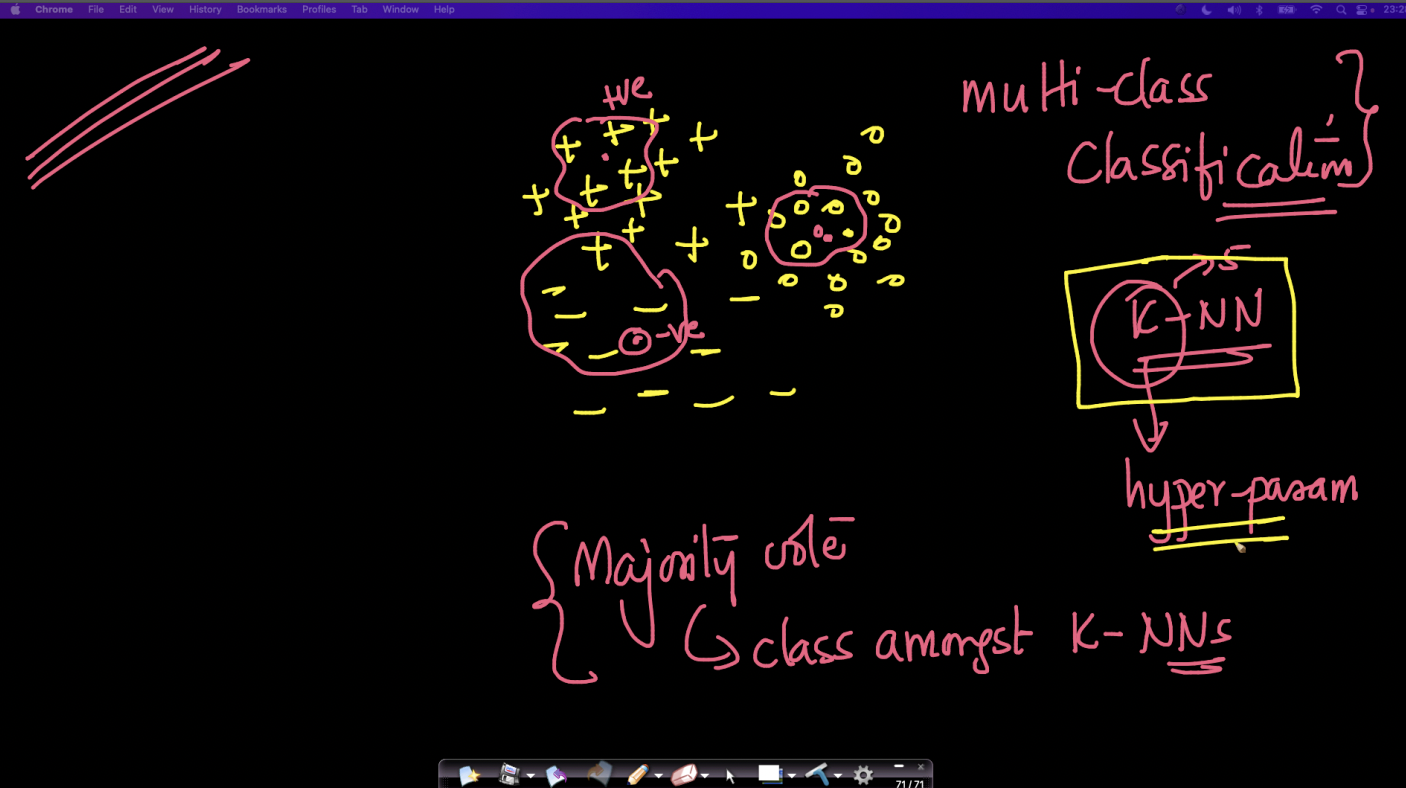

In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
#https://drive.google.com/file/d/1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 19.6MB/s]


In [ ]:
df=pd.read_csv('multiclass.csv')
df.head()

Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  class
0       3  12669  9656     7561     214              2674        1338      2
1       3   7057  9810     9568    1762              3293        1776      2
2       3   6353  8808     7684    2405              3516        7844      2
3       3  13265  1196     4221    6404               507        1788      1
4       3  22615  5410     7198    3915              1777        5185      1

In [ ]:
df.describe()

Region          Fresh          Milk       Grocery        Frozen  \
count  440.000000     440.000000    440.000000    440.000000    440.000000   
mean     2.543182   12000.297727   5796.265909   7951.277273   3071.931818   
std      0.774272   12647.328865   7380.377175   9503.162829   4854.673333   
min      1.000000       3.000000     55.000000      3.000000     25.000000   
25%      2.000000    3127.750000   1533.000000   2153.000000    742.250000   
50%      3.000000    8504.000000   3627.000000   4755.500000   1526.000000   
75%      3.000000   16933.750000   7190.250000  10655.750000   3554.250000   
max      3.000000  112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen       class  
count        440.000000    440.000000  440.000000  
mean        2881.493182   1524.870455    2.195455  
std         4767.854448   2820.105937    0.744289  
min            3.000000      3.000000    1.000000  
25%          256.750000    408.250000    2.000000  
50%          816.500000    965.500000    2.000000  
75%         3922.000000   1820.250000    3.000000  
max        40827.000000  47943.000000    3.000000

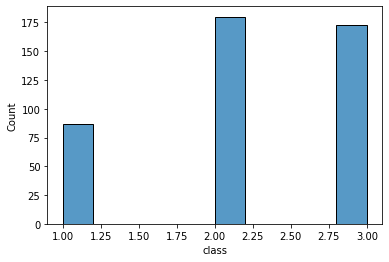

In [ ]:
sns.histplot(data=df, x="class")

In [ ]:
X=df[['Region',	'Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen'	]].copy()
y=df[['class']].copy()

In [ ]:
# reducing features to just 2 features
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X.shape

(440, 2)

In [ ]:
df2 = pd.DataFrame(X, columns=['f1', 'f2'])
df2['y'] = y

df2.head()

f1           f2  y
0    650.022124  1585.519090  2
1  -4426.804978  4042.451509  2
2  -4841.998705  2578.762176  2
3    990.346438 -6279.805996  1
4  10657.998733 -2159.725815  1

In [ ]:
print(pca.explained_variance_ratio_)

[0.45961362 0.40517227]


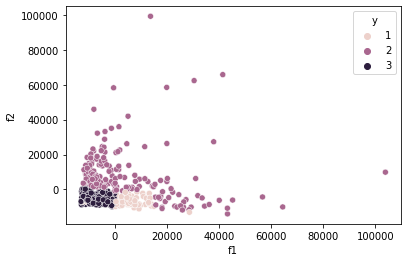

In [ ]:
sns.scatterplot(data= df2, x= 'f1',y = 'f2' , hue = 'y')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2[['f1', 'f2']].values, df2['y'].values,test_size=0.20, random_state=42)


In [ ]:
print(f'Training data: {X_train.shape}, {y_train.shape}')
print(f'Test data:{X_test.shape}, {y_test.shape}')

Training data: (352, 2), (352,)
Test data:(88, 2), (88,)


Calculating  $K_{best}$
- with k values ranging: $1 \le k \le 50$

Note: Error defined as 1-accuracy

In [ ]:
error = []

# Calculating error for K values between 1 and 50
# Note: 51 is not included in the loop 
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Visualizing the error and K values

Text(0, 0.5, 'Mean Error')

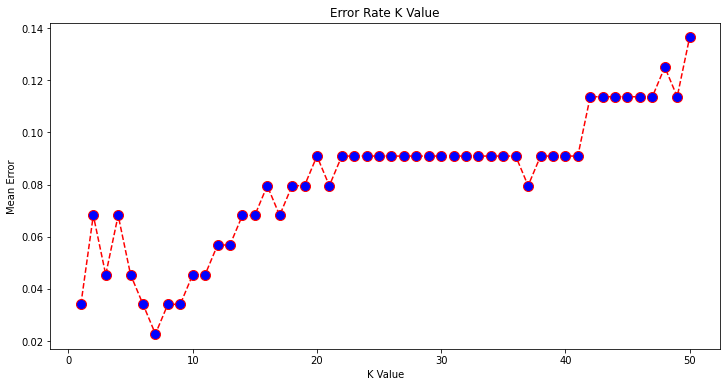

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

- Noticing that the first K value where Mean error is lowest is at K = 7,
- Hence $K_{best} = 7$

Note: The finding of $K_{best}$ was done on Validation Data

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7,metric='euclidean')

knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=7)

Accuracy of KNN on Test data

In [ ]:
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.9772727272727273

Precision, Recall, F1-Score of KNN on test data 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        16
           2       0.97      0.97      0.97        39
           3       0.97      1.00      0.99        33

    accuracy                           0.98        88
   macro avg       0.98      0.97      0.98        88
weighted avg       0.98      0.98      0.98        88



## Outliers
Lets consider some data points which have 3 outliers, 
- Out of which two are -ve class labels and one is +ve class label

Do outliers impact the kNN model if we take K = 3?
- for the two -ve class outliers, the $x_q$ will get impacted and have a -ve class label , instead of +ve class label

- While for the +ve class outlier, the $x_q$ is predicted correctly

What if we reduce K to K=1 will outliers effect KNN?
- Both the outliers effect the KNN 

What if we increase K to K=7 will outliers effect KNN?
- No, the outliers wont have any impact since the neighborhood will have majority of correct labels 






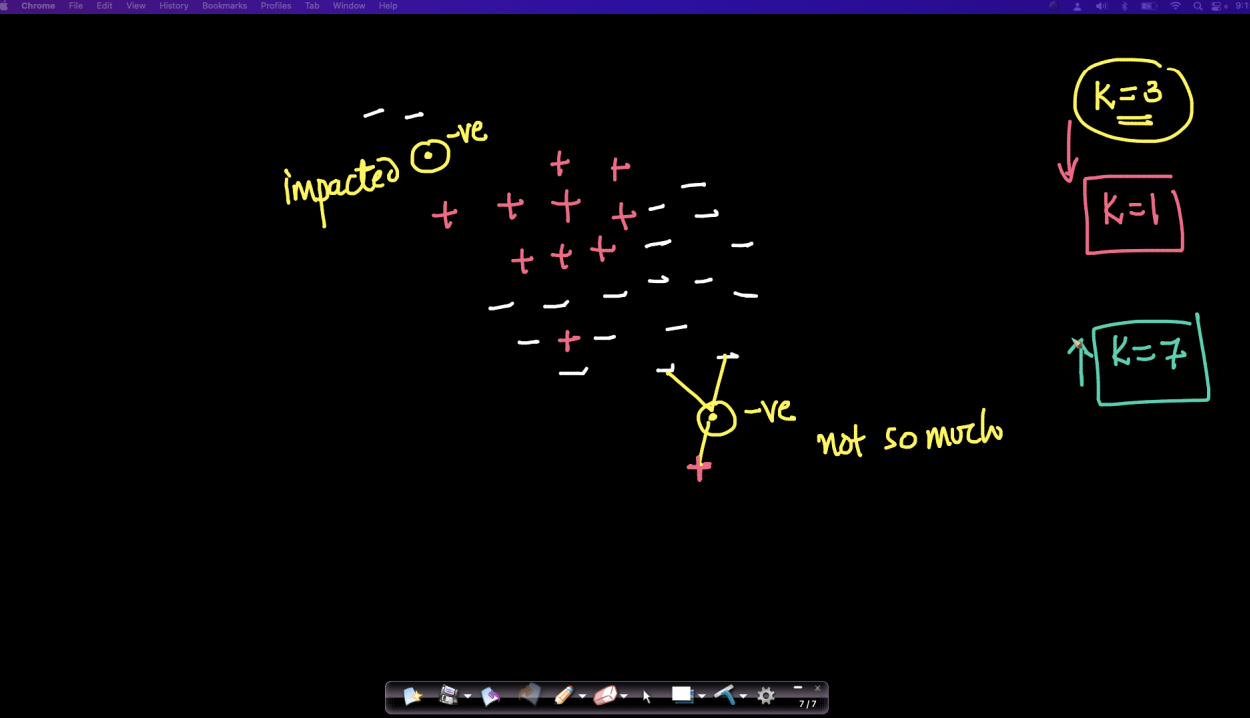

## KNN based Imputation

### Missing Value Patterns
The absence of values is a cause of concern for real-life datasets. When collecting observations about a variable, missing values can occur due to reasons as diverse as –

* an error in machinery/equipment
* error on part of the researcher
* unavailable respondents
* accidental deletion of observations
* forgetfulness on part of the respondents
* error in accounting, etc.
 Types of missing values can generally be classified as:

###Missing Completely at Random (MCAR)
This happens when the missing values have no hidden dependency on any other variable or any characteristic of observations.

###Missing at Random (MAR)
In this case, the probability of missing value depends on the characteristics of observable data. 

###Missing Not at Random (MNAR)
This happens when the missing values depend on both characteristics of the data and also on missing values. In this case,  determining the mechanism of the generation of missing value is difficult. 

### KNN imputation
Lets say we have a d-dimensionsal features with n samples. 
- Now for the $x_i$ feature,
    - the $j^{th}$ dimension is missing  


We have seen in EDA, hown imputation is used to fill the missing values 


#### Can we use KNN for Imputating missing data ? 
1. to find the value of $x_{ij}$, we find the K Nearest neighbors  for the $x_{i}$ but excluding all the dimensions which have missing value.
    - Hence we remove the jth dimension and compute the nearest neighbors 

2. Supposedly, after performing KNN(with K = 5) we get $x_{10}, x_{12}, x_{14}, x_{31}, x_{42}$ as nearest neighbors
    - we then take the average of the $j^{th}$  values of each of the nearest neighbors and use it to impute the missing value for $x_i$




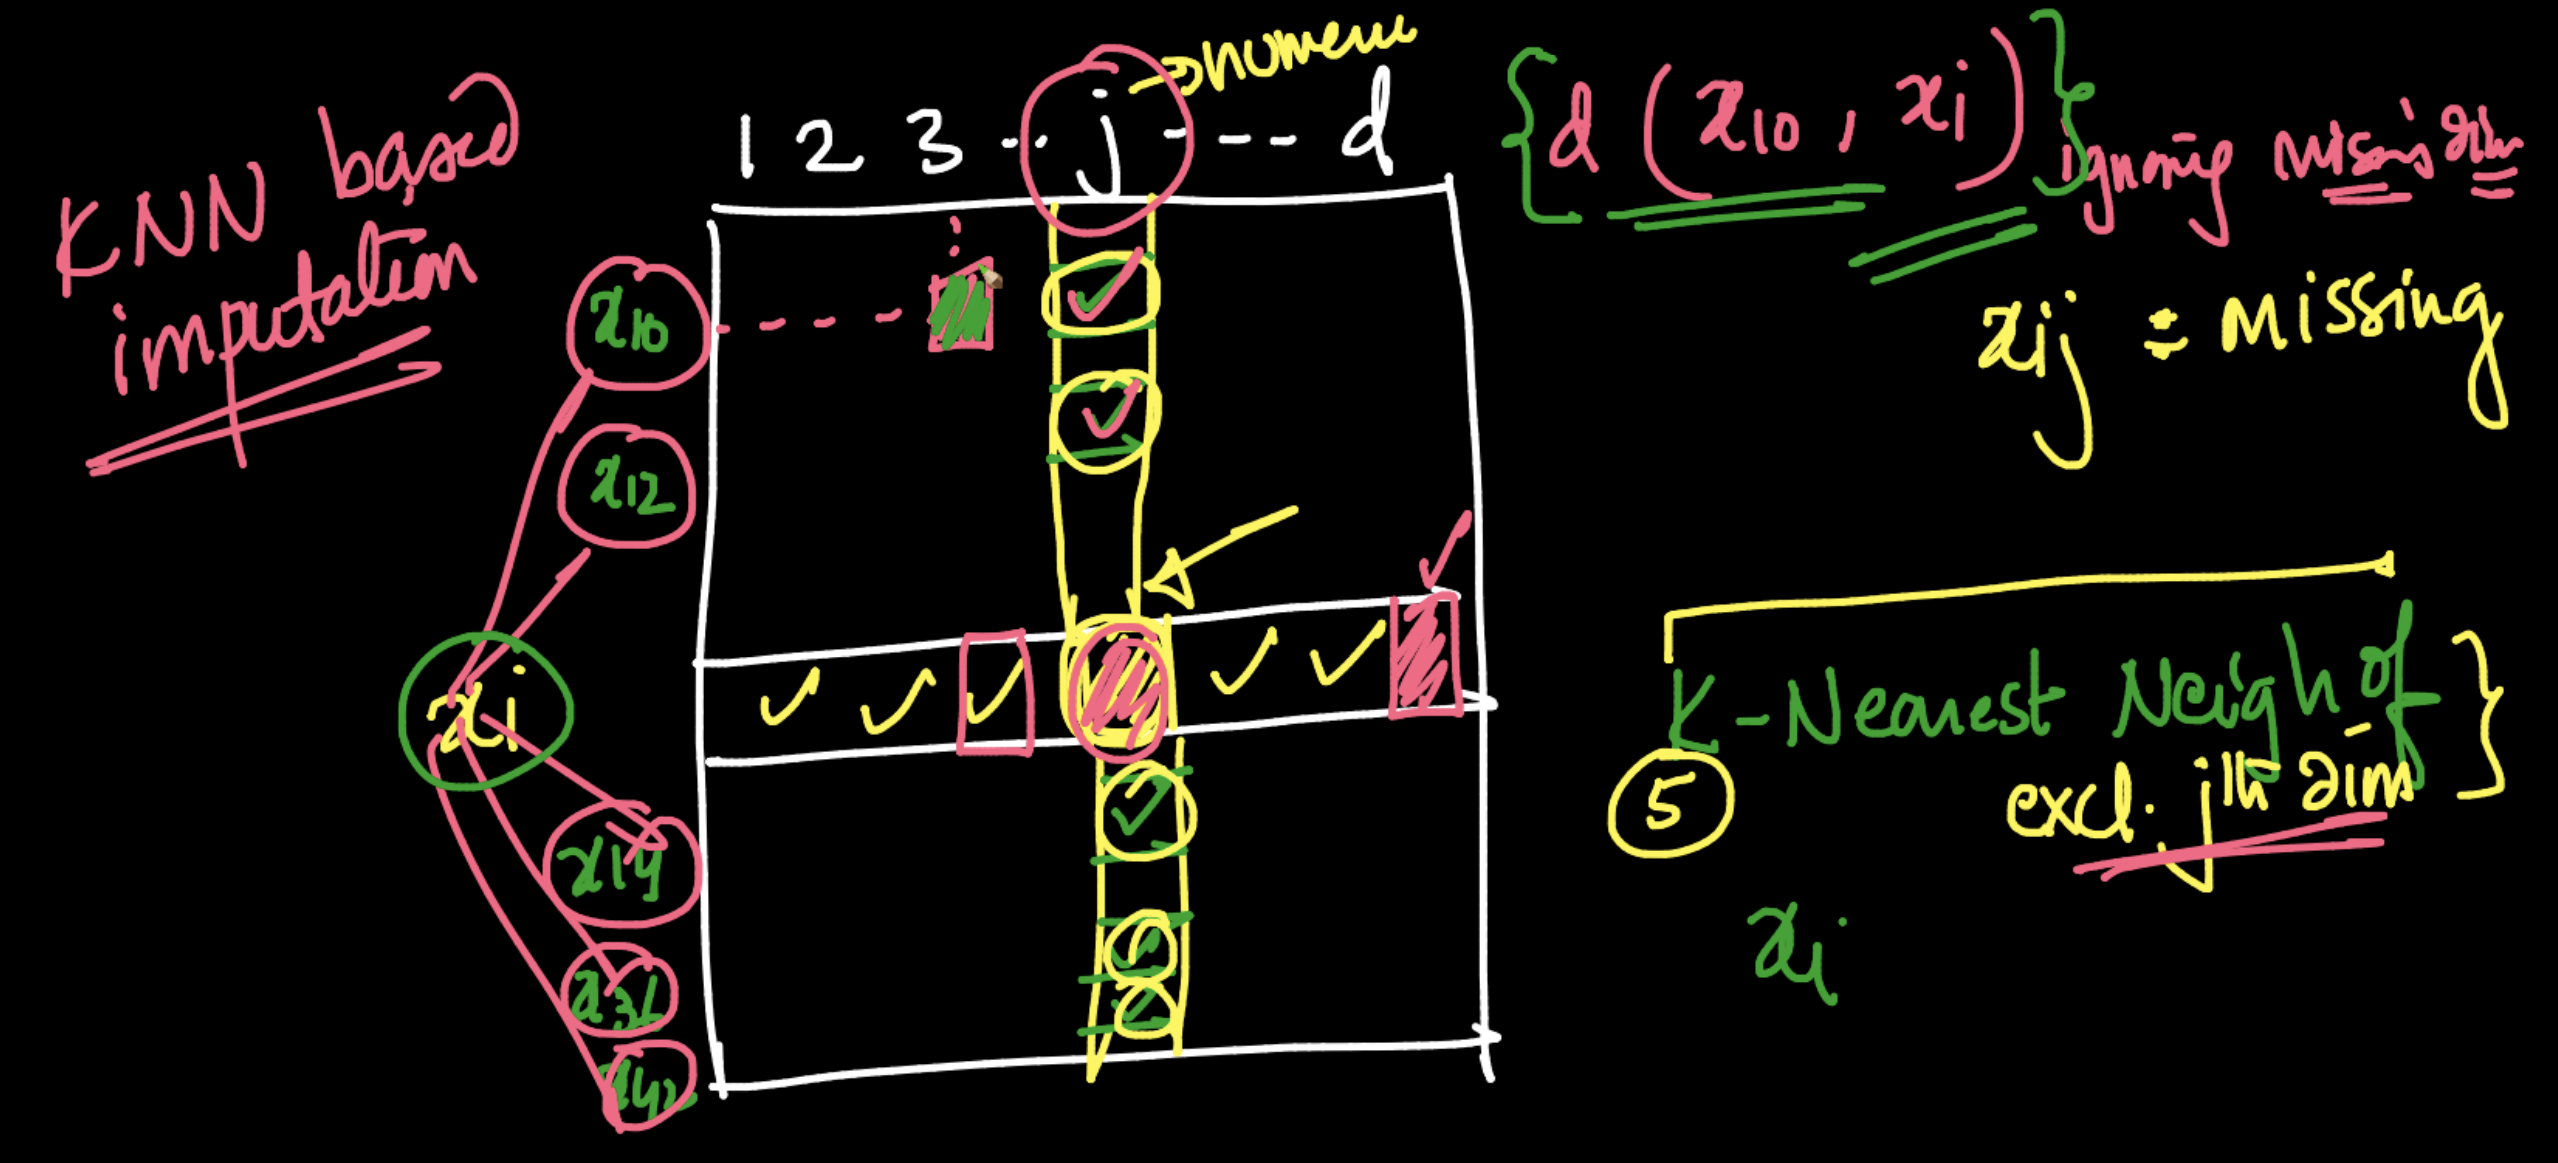

In [ ]:
!gdown 1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS
#https://drive.google.com/file/d/1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS
To: /content/knn_imputation.csv
100% 12.9k/12.9k [00:00<00:00, 18.7MB/s]


In [ ]:
df_imp=pd.read_csv('knn_imputation.csv')

In [ ]:
df_imp.isna().sum()


Unnamed: 0           0
Region               8
Fresh               13
Milk                15
Grocery              9
Frozen               8
Detergents_Paper    10
Delicassen          11
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values. For simplicity, we will use Scikit-Learn’s MinMaxScaler which will scale our variables to have values between 0 and 1.

In [ ]:
scaler = MinMaxScaler()
df_imp = pd.DataFrame(scaler.fit_transform(df_imp), columns = df_imp.columns)
df_imp.head()

Unnamed: 0  Region     Fresh      Milk   Grocery    Frozen  \
0    0.000000     1.0  0.112821  0.129791  0.081464  0.003106   
1    0.003759     1.0  0.062774  0.131890  0.103097  0.028548   
2    0.007519     1.0  0.056495  0.118232       NaN  0.039116   
3    0.011278     1.0  0.118136  0.014476  0.045464  0.104842   
4    0.015038     1.0  0.201520  0.071915  0.077552  0.063934   

   Detergents_Paper  Delicassen  
0          0.065427    0.027847  
1          0.080590    0.036984  
2          0.086052    0.163559  
3          0.012346    0.037234  
4          0.043455    0.108093

In [ ]:
imputer = KNNImputer(n_neighbors=5)
df_imp = pd.DataFrame(imputer.fit_transform(df_imp),columns = df_imp.columns)

In [ ]:
df_imp.isna().sum()


Unnamed: 0          0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

**ASSESSMENT COVERED**
- https://www.scaler.com/hire/test/problem/20527/ 